<a href="https://colab.research.google.com/github/grnascimento/IC/blob/main/notebooks/Machine_Deep_Learning_Iniciacao_Cientifica_julho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adequações do banco e parâmetros do Python

In [ ]:
!pip install xlrd==2.0.1 --q

     |████████████████████████████████| 96 kB 3.0 MB/s 


In [ ]:
!pip install yellowbrick --q

In [ ]:
!pip install Boruta --q

     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import string
import warnings
warnings.filterwarnings("ignore")
import datetime
from datetime import date, timedelta, datetime
from dateutil.parser import parse
d2 = datetime.now()
from boruta import BorutaPy
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection, svm

In [ ]:
banco = pd.read_excel('/content/drive/MyDrive/IC/bancofinalic.xlsx')

In [ ]:
banco = banco.drop(['Unnamed: 0'], axis=1)

In [ ]:
colunas = (banco.loc[:, banco.isnull().mean() > .01]).columns.tolist()
colunas

['Marca', 'Conta SIAFEM - Próprio', 'Complemento Endereço']

In [ ]:
banco = banco.drop(colunas, axis=1)

In [ ]:
df = banco.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Identificador                   4449 non-null   int64         
 1   Área de Patrimônio              4449 non-null   object        
 2   Tipo                            4449 non-null   object        
 3   Descrição                       4449 non-null   object        
 4   Situação                        4449 non-null   object        
 5   Data Situação                   4449 non-null   object        
 6   Status Bem                      4449 non-null   object        
 7   Conta Contábil                  4449 non-null   object        
 8   Grupo                           4449 non-null   object        
 9   Modalidade                      4449 non-null   object        
 10  Processo                        4449 non-null   object        
 11  Órgã

In [ ]:
categorical = []
notcategorical = []
datas = []

In [ ]:
for col in df:
  if df[col].dtypes == 'object':
    categorical.append(col)
  elif df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
    notcategorical.append(col)
  else:
    datas.append(col)

In [ ]:
df = df.drop(datas, axis=1)

In [ ]:
for i in range(len(categorical)):
  df[categorical[i]].astype('category')
  le = preprocessing.LabelEncoder()
  le.fit(df[categorical[i]])
  df[categorical[i]]=le.transform(df[categorical[i]])
  print('As categorias de', categorical[i] , 'eram:' , le.classes_ , 'e mudaram para:' , sorted(df[categorical[i]].unique()))

As categorias de Área de Patrimônio eram: ['AEPLAN' 'ASCOM' 'BCCL' 'BENS DISPONÍVEIS' 'CAISM' 'CCG' 'CCS' 'CCUEC'
 'CEB' 'CECOM' 'CEL' 'CEMEQ' 'CEMIB' 'CENAPAD' 'CGU' 'CLE' 'COCEN'
 'COCEN/CBMEG' 'COCEN/CEPAGRI' 'COCEN/CESOP' 'COCEN/CIDDIC' 'COCEN/CMU'
 'COCEN/CPETRO' 'COCEN/NEPA' 'COCEN/NEPAM' 'COCEN/NEPO' 'COCEN/NEPP'
 'COCEN/NICS' 'COCEN/NIED' 'COCEN/NUDECRI' 'COCEN/PAGU' 'COTIL' 'COTUCA'
 'CPF' 'CPP' 'CPQBA' 'DAC' 'DEA' 'DEDIC' 'DEPI' 'DERI' 'DGA' 'DGRH'
 'DIRCUL' 'DLIE' 'EA2' 'EDITORA' 'EDUCORP' 'EXTECAMP' 'FCA' 'FCF' 'FCM'
 'FE' 'FEA' 'FEAGRI' 'FEC' 'FEEC' 'FEF' 'FEM' 'FENF' 'FEQ' 'FOP' 'FT'
 'GASTROCENTRO' 'GGBS' 'GR' 'HC' 'HEMO' 'IA' 'IB' 'IC' 'IE' 'IEL' 'IFCH'
 'IFGW' 'IG' 'IMECC' 'IQ' 'LACTAD' 'MEC' 'OUVIDORIA' 'PG' 'PRDU' 'PRE'
 'PRE/CAC' 'PRE/CASA DO LAGO' 'PREFEITURA' 'PRG' 'PRG/GGTE' 'PRG/PROFIS'
 'PROGRAMA UniversIDADE' 'PRP' 'PRPG' 'RTV' 'SAE' 'SAPPE' 'SG' 'SIARQ'
 'SIC' 'SVC'] e mudaram para: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

In [ ]:
np.random.seed(123)
rand = np.random.seed(123)

In [ ]:
X = df.iloc[:,0:51]
xcolunas = X.columns.to_list()
X1 = X.copy()

In [ ]:
scaler = StandardScaler()
scaler.fit(X1[xcolunas])
X1[xcolunas] = scaler.transform(X1[xcolunas])

In [ ]:
y = df.iloc[:,51:]
y = y['classe'].ravel()

#Feature selection

In [ ]:
X1 = X.to_numpy() #passo fundamental, se o X não estiver em ndarray não faz o Botura

In [ ]:
classifier = RandomForestClassifier(n_jobs=-1, max_depth=5, class_weight='balanced', random_state=rand)
classifier = classifier.fit(X1, y)
feat_selector = BorutaPy(classifier, n_estimators='auto', verbose=0, random_state=rand)

feat_selector.fit(X1, y)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=176, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F8F037DC9E0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F8F037DC9E0)

In [ ]:
index_drop = feat_selector.support_
xcolunasdel = []
for i in range(len(index_drop)):
    if index_drop[i] == False:
        xcolunasdel.append(xcolunas[i])

In [ ]:
X = X.drop(xcolunasdel, axis=1)

In [ ]:
banco_otimizado = X.copy()
banco_otimizado['classe'] = y.copy()
banco_otimizado.to_excel('/content/drive/MyDrive/IC/banco_otimizado.xlsx')

In [ ]:
banco_otimizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identificador                   4449 non-null   int64  
 1   Área de Patrimônio              4449 non-null   int64  
 2   Descrição                       4449 non-null   int64  
 3   Data Situação                   4449 non-null   int64  
 4   Modalidade                      4449 non-null   int64  
 5   Processo                        4449 non-null   int64  
 6   Órgão Fabric.                   4449 non-null   int64  
 7   Data Doc. Fiscal                4449 non-null   int64  
 8   Valor Aquisição                 4449 non-null   float64
 9   Órgão                           4449 non-null   int64  
 10  Desc. Órgão                     4449 non-null   int64  
 11  Imóvel                          4449 non-null   int64  
 12  Saldo Contábil                  44

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, shuffle=True, random_state=rand )

#Modelos de ML e DL

In [ ]:
classifiers = {'OvO_SVC': Pipeline([('scaler',StandardScaler()),
                                    ('classifier', OneVsOneClassifier(svm.SVC(C=2,random_state=rand, decision_function_shape='ovo',
                                                                              class_weight='balanced'),n_jobs=-1))]),
               'OvR_SVC': Pipeline([('scaler',StandardScaler()),
                                    ('classifier', OneVsRestClassifier(svm.SVC(C=20,class_weight='balanced',random_state=rand,
                                                                               decision_function_shape='ovr'),n_jobs=-1))]),
               'KNC' : Pipeline([('scaler',StandardScaler()),
                                    ('classifier', KNeighborsClassifier(n_neighbors=4, leaf_size=2, p=1, n_jobs=-1))]),
               'Decision_TreeOF' : DecisionTreeClassifier(random_state=rand,class_weight='balanced'),
               'Decision_Tree' : Pipeline([('scaler',StandardScaler()),
                                          ('classifier', DecisionTreeClassifier(criterion='gini',max_depth=20, random_state=rand,class_weight='balanced', 
                                            max_features='auto',ccp_alpha=0.000001,min_samples_leaf=3))]),
               'Random_Forest' : Pipeline([('scaler',StandardScaler()),
                                            ('classifier', RandomForestClassifier(random_state=rand,n_jobs=-1,class_weight='balanced',
                                                criterion='gini',max_depth=20, max_features='auto', 
                                                ccp_alpha=0.01, min_samples_leaf = 10))]),
               'Extra_Trees' : Pipeline([('scaler',StandardScaler()),
                                          ('classifier', ExtraTreesClassifier(random_state=rand,n_jobs=-1,class_weight='balanced',
                                                min_samples_split=6,criterion='entropy',max_depth=5, max_features='sqrt',
                                                ccp_alpha=0.00001, min_samples_leaf = 8))]),
               'Gradient_Boosting' :Pipeline([('scaler',StandardScaler()),
                                               ('classifier', GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 5.5e-3, 
                                                loss= 'deviance', max_depth= 3, max_features= 'sqrt', random_state=rand, min_samples_leaf = 8,
                                                ccp_alpha=0.001, min_samples_split=2))]),
               'MLP' :  Pipeline([('scaler',StandardScaler()),
                                    ('classifier',MLPClassifier(early_stopping=True,random_state=rand,hidden_layer_sizes= (4,), learning_rate= 'invscaling',
                                    learning_rate_init= 0.01, solver='lbfgs'))])
               }

#Funções de avaliação

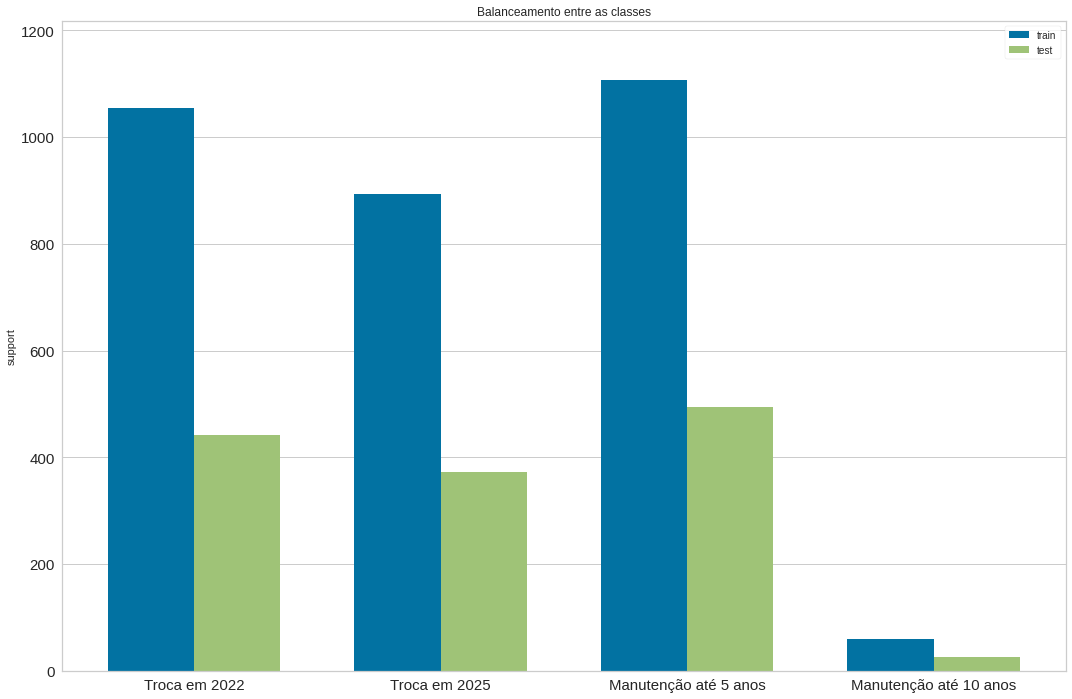

In [ ]:
from yellowbrick.target import ClassBalance

class_name = ['Troca em 2022', 'Troca em 2025', 'Manutenção até 5 anos',  'Manutenção até 10 anos']

plt.figure(figsize=(15, 10))
# Instantiate the visualizer
title = "Balanceamento entre as classes"
visualizer = ClassBalance(labels=class_name,title=title)
visualizer.fit(y_train, y_test)
visualizer.finalize()  # creates title, legend, etc.
visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
visualizer.ax.title.set_fontsize(30)  # change size of title

for text in visualizer.ax.legend_.texts:  # change size of legend texts
     text.set_fontsize(20)

for label in visualizer.ax.texts:
    label.set_size(20)

visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
visualizer.show(outpath="/content/drive/MyDrive/IC/des/d12.svg")
visualizer.fig.show()

In [ ]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(classifier, X_train, y_train, X_test, y_test,class_name,name):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_ylim(0.6,1)
    # Creating visualization with the readable labels
    visualizer = ROCAUC(classifier, classes=class_name, support=True, ax=ax)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()  # creates title, legend, etc.
    visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
    visualizer.ax.title.set_fontsize(30)  # change size of title

    for text in visualizer.ax.legend_.texts:  # change size of legend texts
        text.set_fontsize(20)

    for label in visualizer.ax.texts:
        label.set_size(20)

    
    visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
    visualizer.show(outpath=f"/content/drive/MyDrive/IC/des/roc_{name}.svg")
    visualizer.fig.show()
    return visualizer

In [ ]:
from yellowbrick.classifier import ClassificationReport

def matrix(classifier, X_train, y_train, X_test, y_test,class_name,name):
    plt.figure(figsize=(15, 10))
    # Creating visualization with the readable labels
    visualizer = ClassificationReport(classifier, classes=class_name, support=True)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)

    visualizer.finalize()  # creates title, legend, etc.
    visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
    visualizer.ax.title.set_fontsize(30)  # change size of title

    for label in visualizer.ax.texts:
        label.set_size(20)

    
    visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
    visualizer.show(outpath=f"/content/drive/MyDrive/IC/des/class_{name}.svg")
    visualizer.fig.show()
    return visualizer

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

def matrixconf(classifier, X_train, y_train, X_test, y_test,class_name,name):
    plt.figure(figsize=(15, 10))
    visualizer = ConfusionMatrix(classifier, classes=class_name,percent=True)
   
    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    visualizer.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    visualizer.score(X_test, y_test)
    visualizer.finalize()  # creates title, legend, etc.
    visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
    visualizer.ax.title.set_fontsize(30)  # change size of title

    for label in visualizer.ax.texts:
        label.set_size(20)

    
    visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
    visualizer.show(outpath=f"/content/drive/MyDrive/IC/des/cm_{name}.svg")
    visualizer.fig.show()
    return visualizer

In [ ]:
from yellowbrick.classifier import ClassPredictionError

def classpred(classifier, X_train, y_train, X_test, y_test,class_name,name):
    plt.figure(figsize=(15, 10))
    visualizer = ClassPredictionError(
        classifier, classes=class_name
    )

    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    visualizer.finalize()  # creates title, legend, etc.
    visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
    visualizer.ax.title.set_fontsize(30)  # change size of title

    for text in visualizer.ax.legend_.texts:  # change size of legend texts
        text.set_fontsize(20)

    for label in visualizer.ax.texts:
        label.set_size(20)

    
    visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
    visualizer.show(outpath=f"/content/drive/MyDrive/IC/des/classpred_{name}.svg")
    visualizer.fig.show()
    return visualizer

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

def precisionc(classifier, X_train, y_train, X_test, y_test,class_name,name):
    plt.figure(figsize=(15, 10))
    visualizer = PrecisionRecallCurve(classifier, per_classe=True, classes=class_name, cmap="Set1")
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.finalize()  # creates title, legend, etc.
    visualizer.ax.tick_params(labelsize=15)  # change size of tick labels
    visualizer.ax.title.set_fontsize(30)  # change size of title

    for text in visualizer.ax.legend_.texts:  # change size of legend texts
        text.set_fontsize(20)

    for label in visualizer.ax.texts:
        label.set_size(20)

    
    visualizer.fig.tight_layout()  # fit all texts nicely into the surrounding figure
    visualizer.show(outpath=f"/content/drive/MyDrive/IC/des/pr_{name}.svg")
    visualizer.fig.show()
    return visualizer

In [ ]:
def crossval(classifier, X_train, y_train, X_test, y_test):
    scoretrain = list(cross_val_score(classifier, X_train, y_train,cv = KFold(10,shuffle=True,random_state=rand), n_jobs=-1))
    scores = [np.mean(scoretrain),np.min(scoretrain),np.max(scoretrain), np.std(scoretrain)] 
    scoretest = cross_val_score(classifier, X_test, y_test,cv = KFold(10,shuffle=True,random_state=rand), n_jobs=-1) 
    print('Scores de Cross Validation: ', scoretrain)
    print('Score médio: ',scores[0], ' Score mínimo: ', scores[1], ' Score máximo: ', scores[2], ' Desvio Padrão: ', scoretrain[3])

#Resultados

Scores de Cross Validation:  [0.9487179487179487, 0.9647435897435898, 0.9615384615384616, 0.9711538461538461, 0.9453376205787781, 0.9646302250803859, 0.9485530546623794, 0.9646302250803859, 0.9614147909967846, 0.9485530546623794]
Score médio:  0.9579272817214939  Score mínimo:  0.9453376205787781  Score máximo:  0.9711538461538461  Desvio Padrão:  0.9711538461538461
Scores de Cross Validation:  [0.9743589743589743, 0.9807692307692307, 0.9551282051282052, 0.967948717948718, 0.9614147909967846, 0.9389067524115756, 0.9581993569131833, 0.9710610932475884, 0.9742765273311897, 0.9646302250803859]
Score médio:  0.9646693874185835  Score mínimo:  0.9389067524115756  Score máximo:  0.9807692307692307  Desvio Padrão:  0.967948717948718
Scores de Cross Validation:  [0.9294871794871795, 0.9038461538461539, 0.8846153846153846, 0.9294871794871795, 0.9228295819935691, 0.9292604501607717, 0.9485530546623794, 0.9485530546623794, 0.9196141479099679, 0.9067524115755627]
Score médio:  0.9222998598400528  

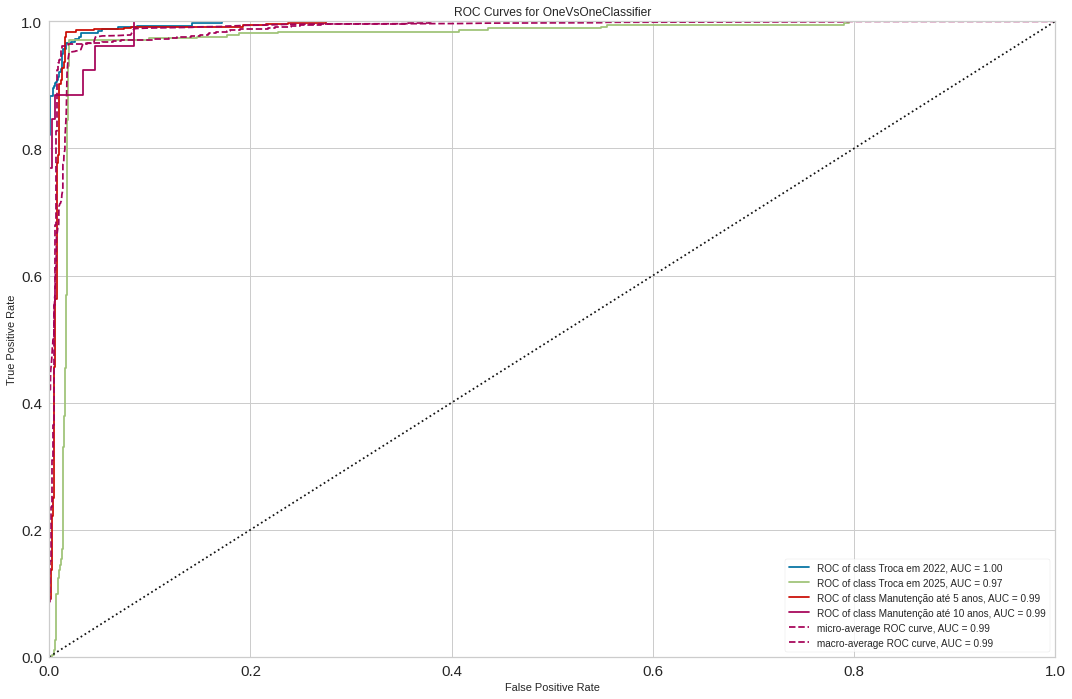

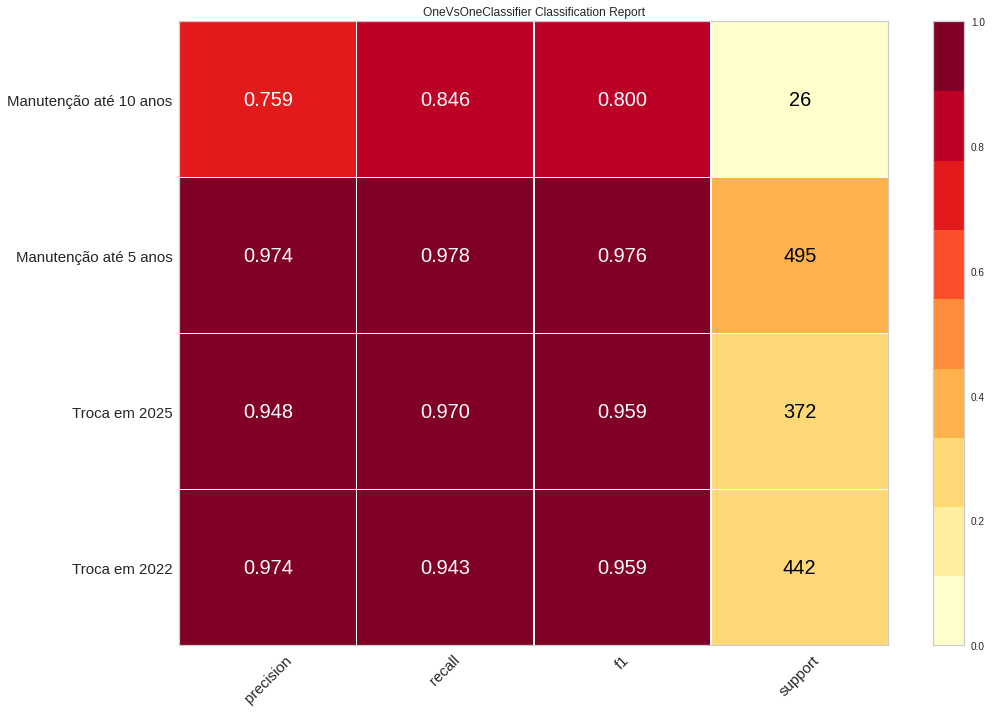

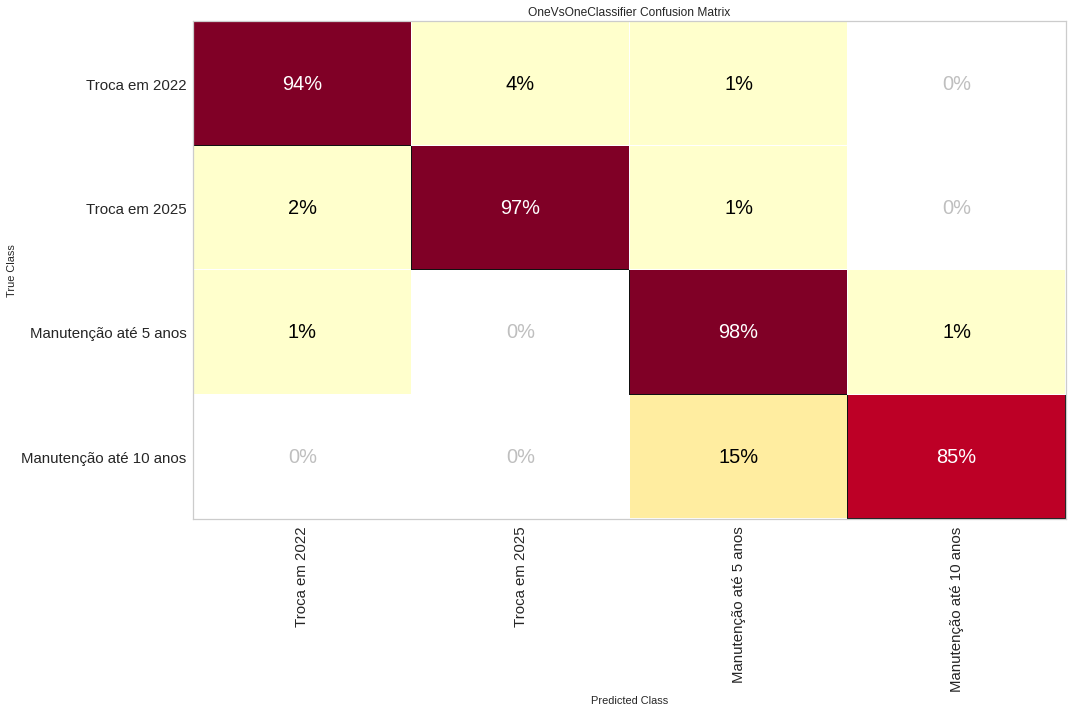

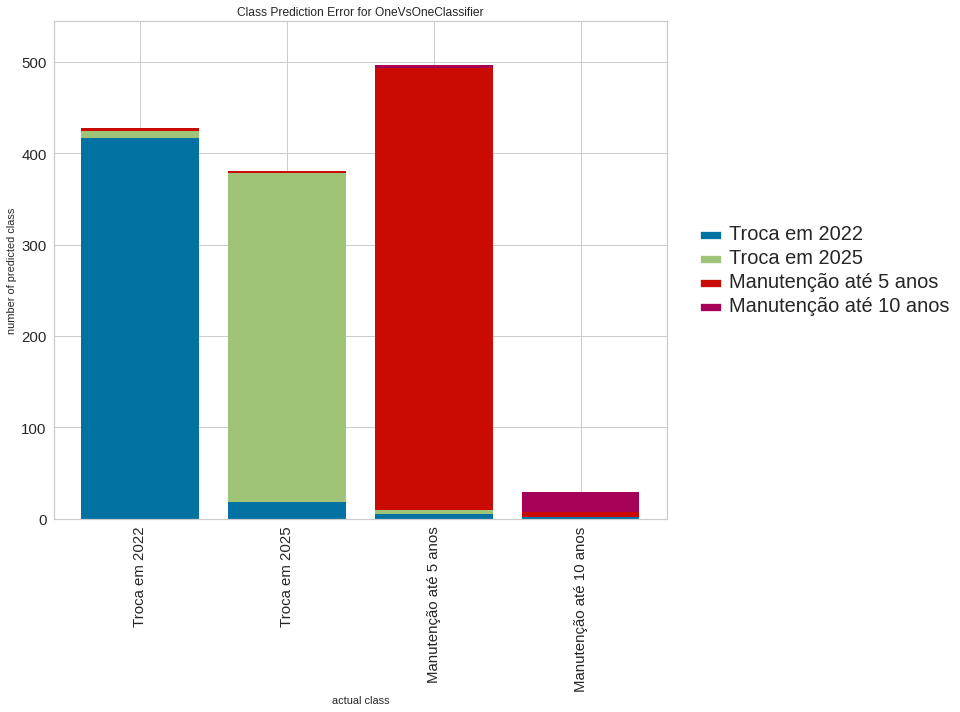

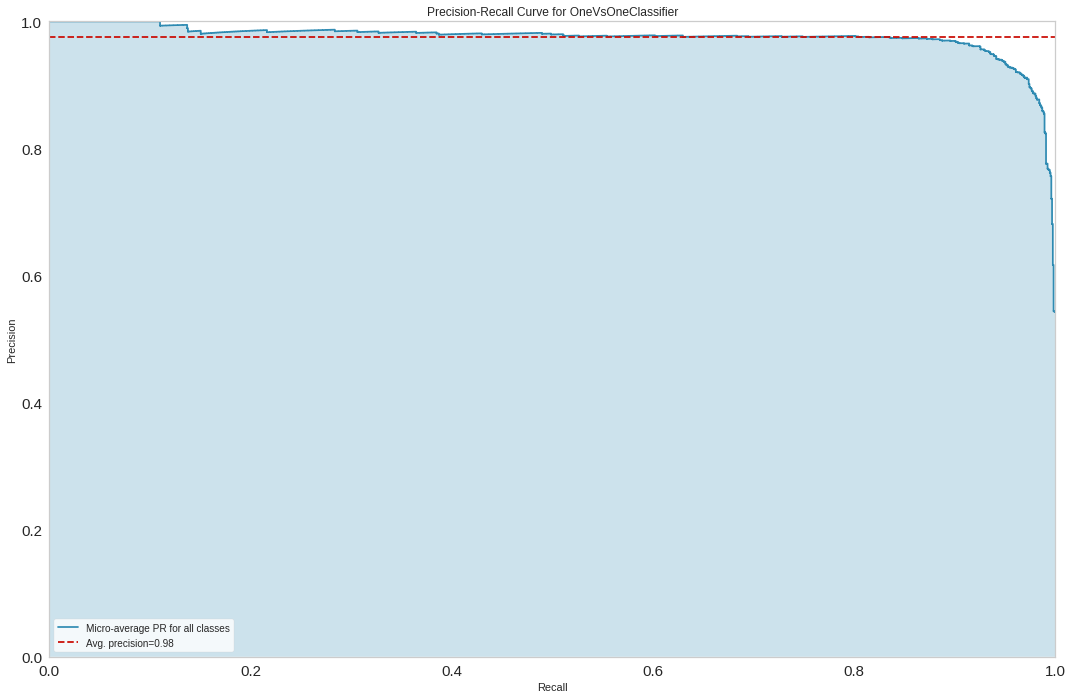

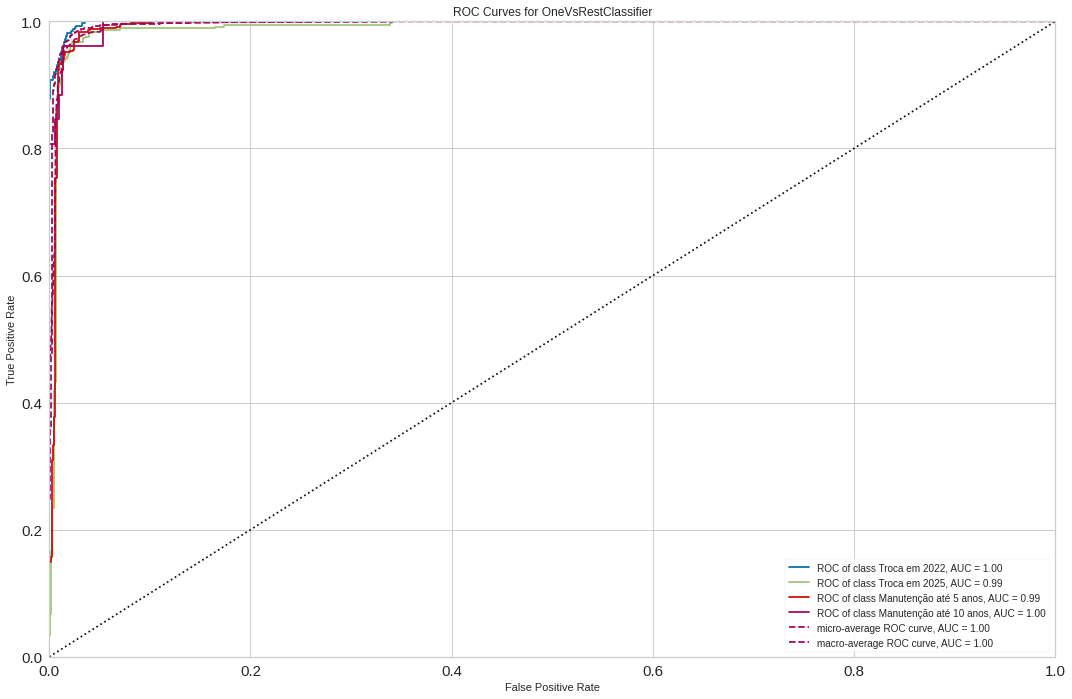

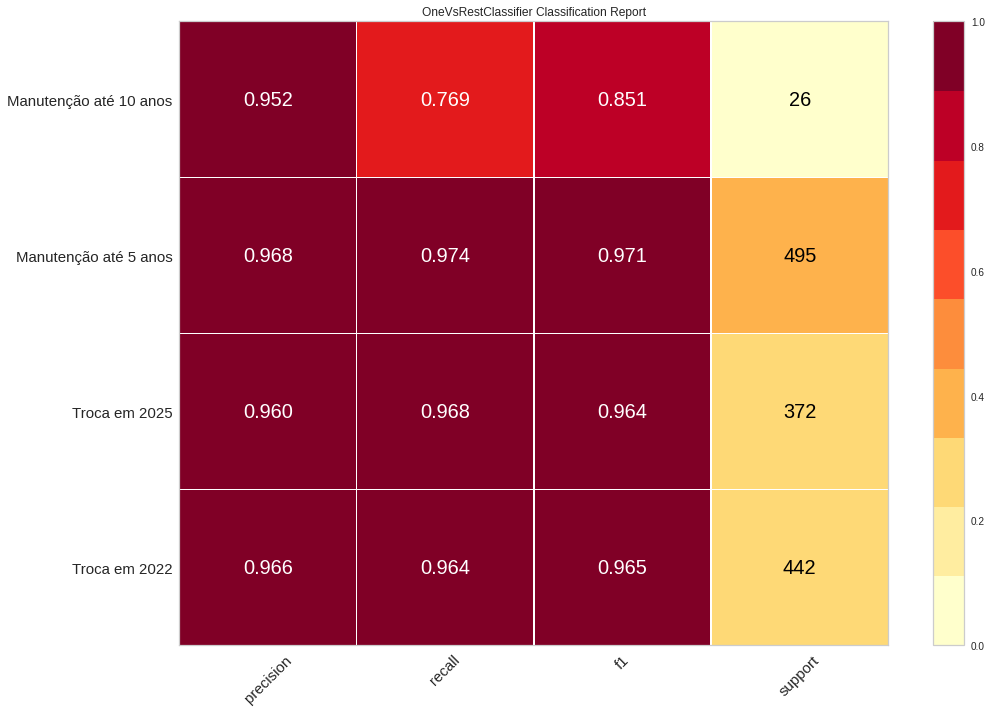

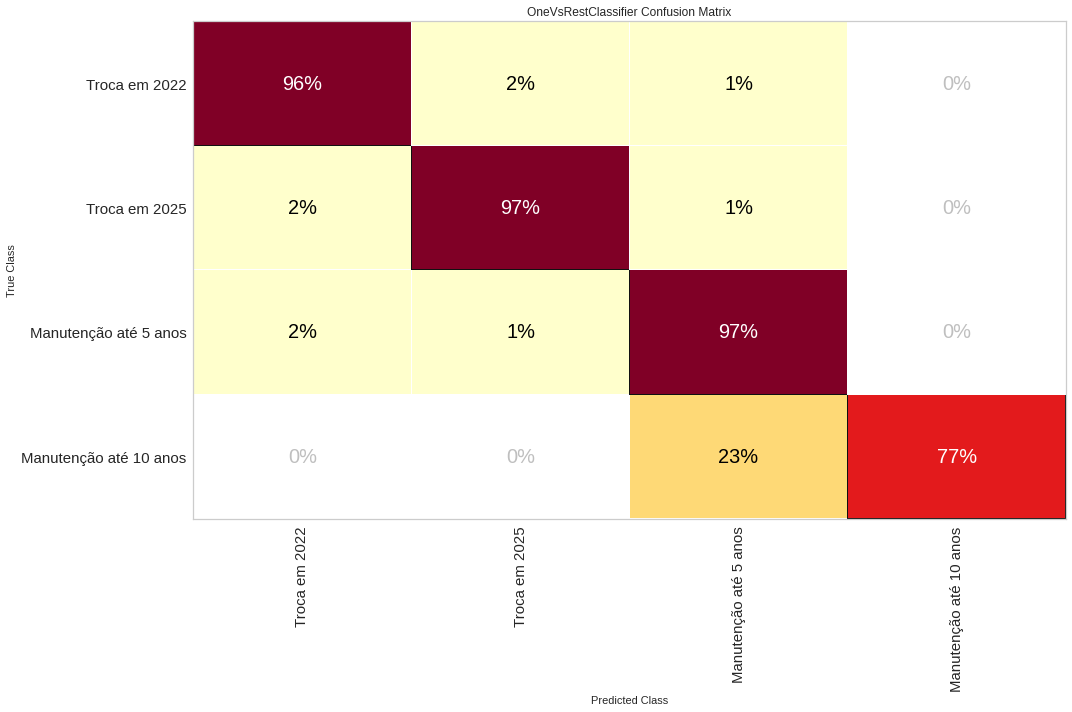

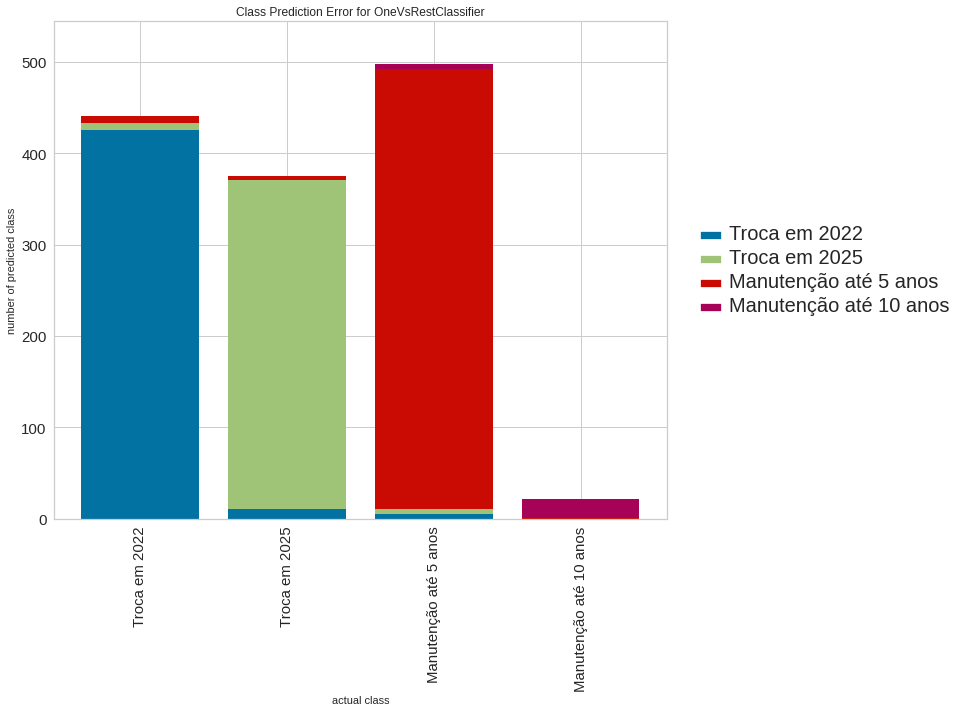

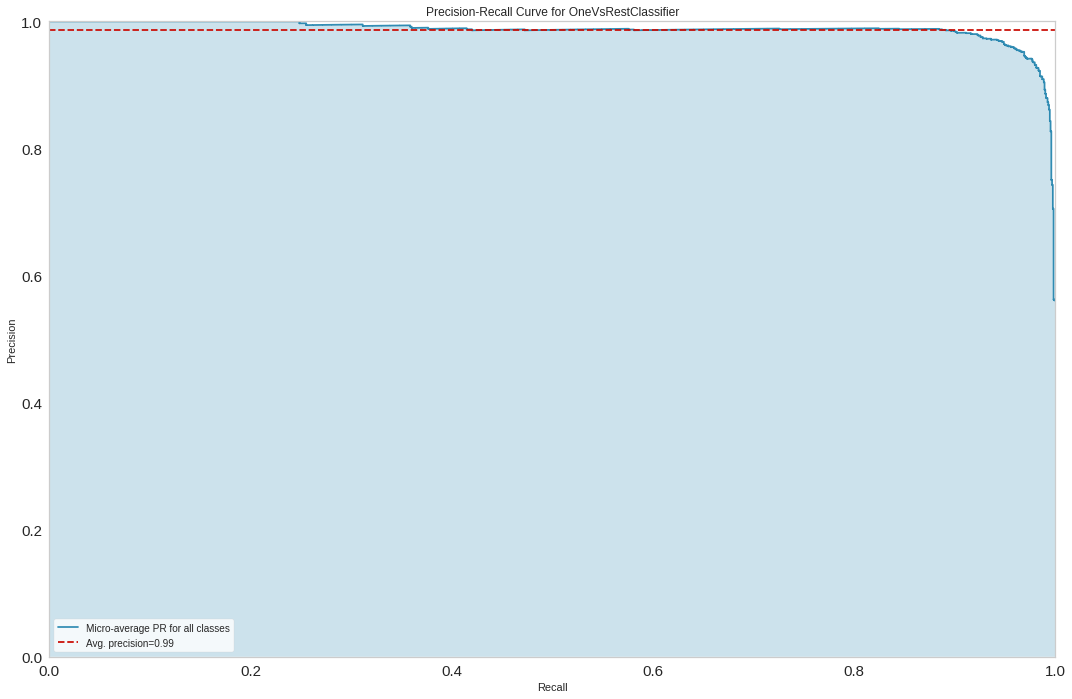

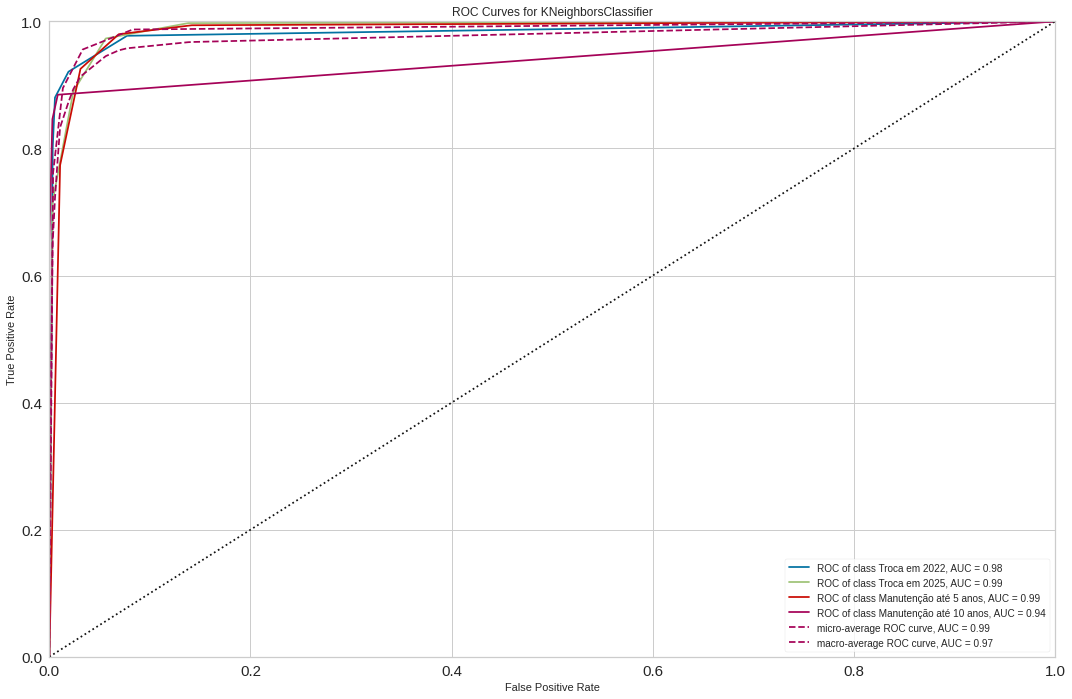

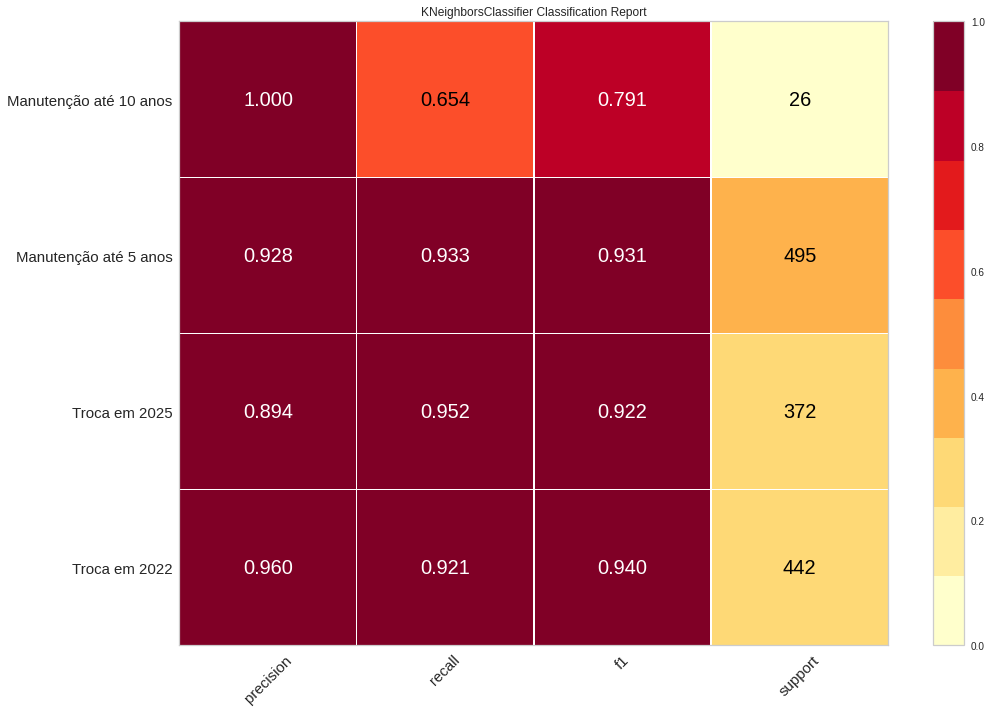

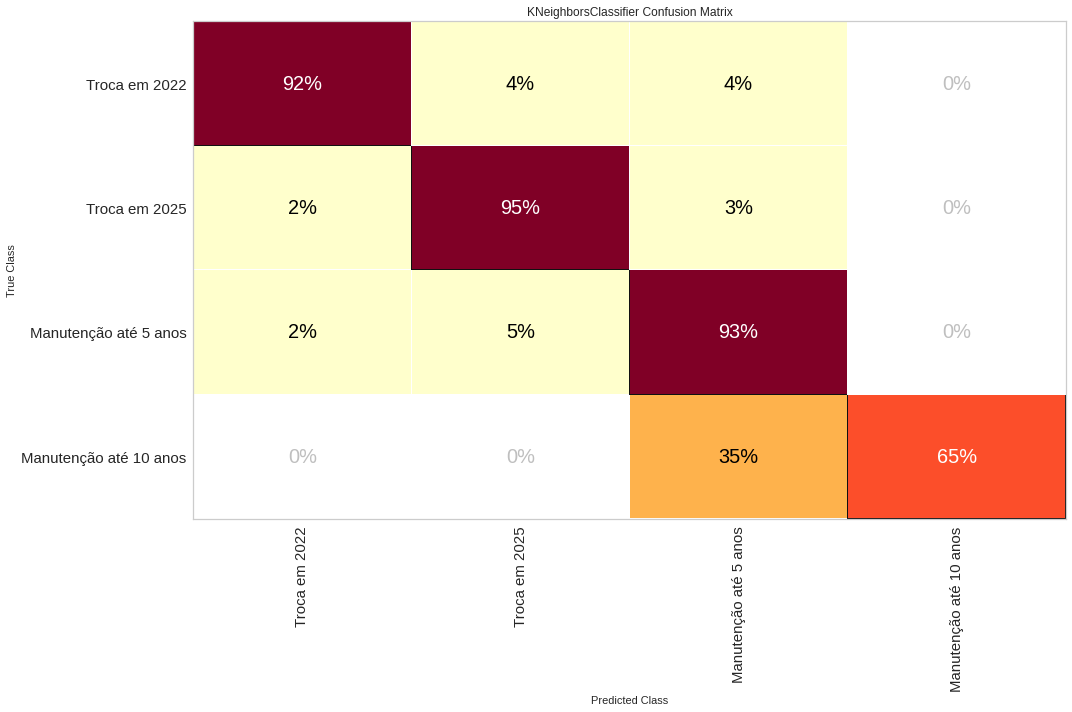

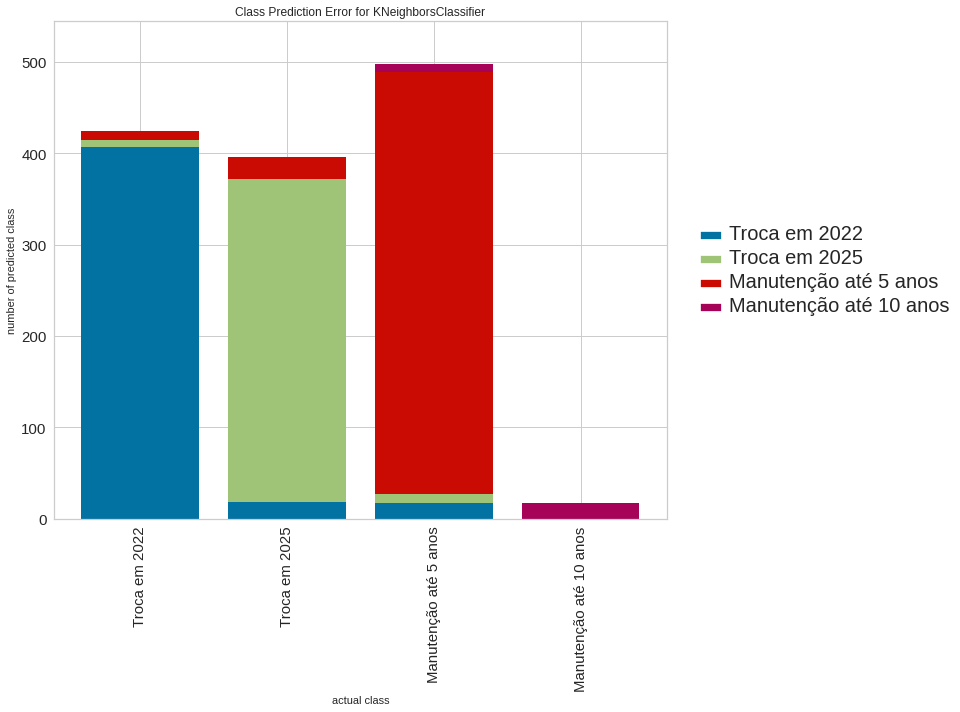

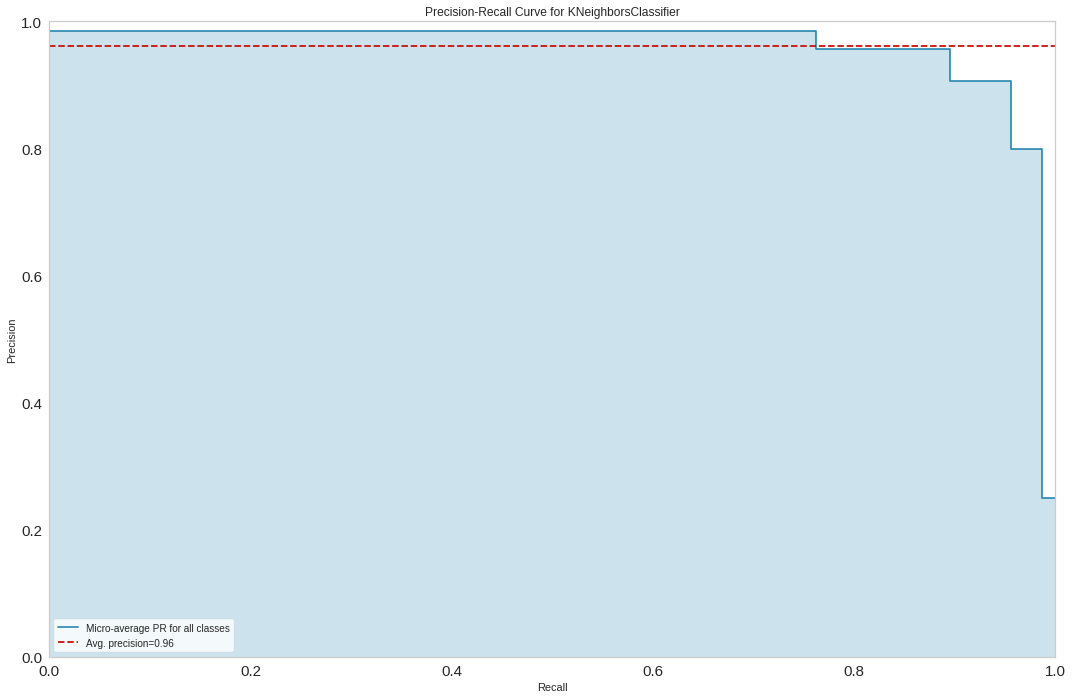

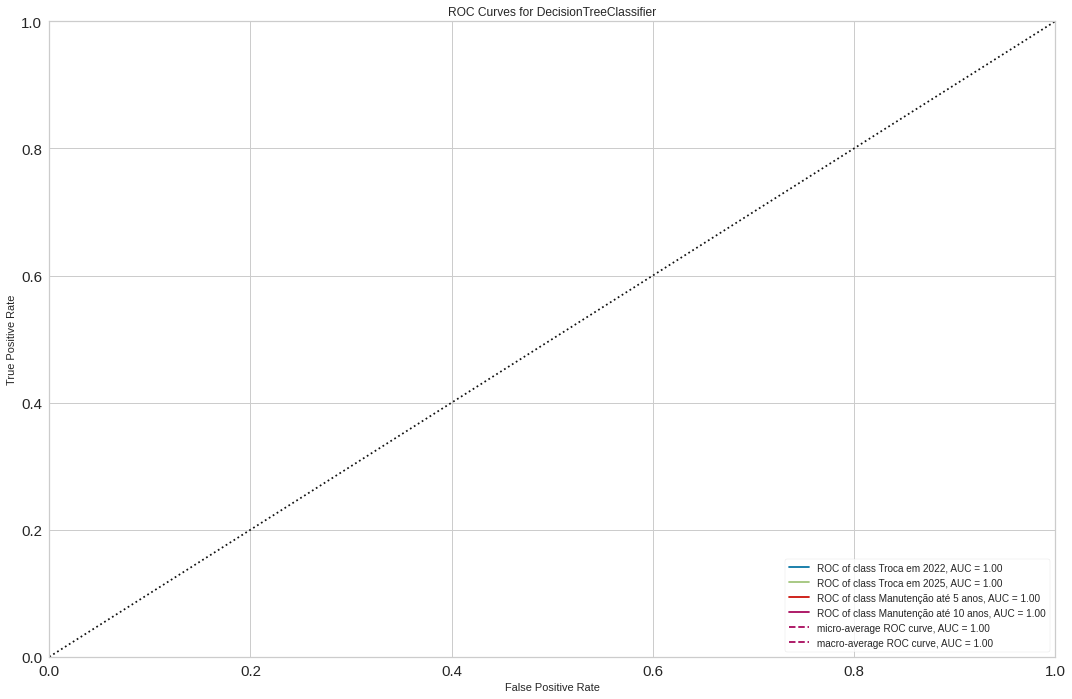

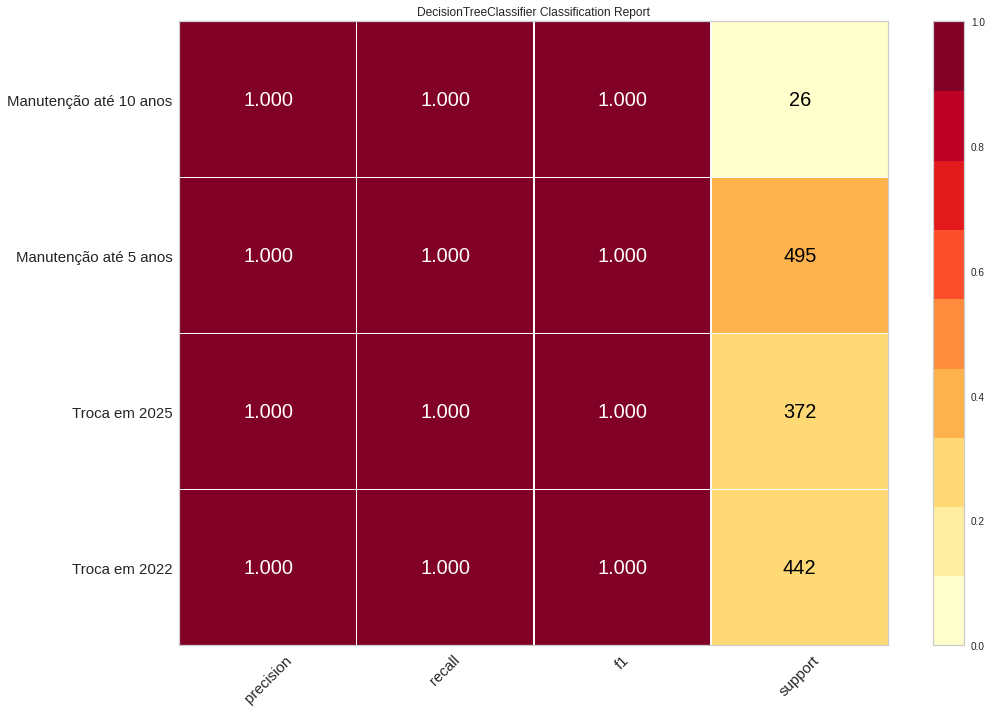

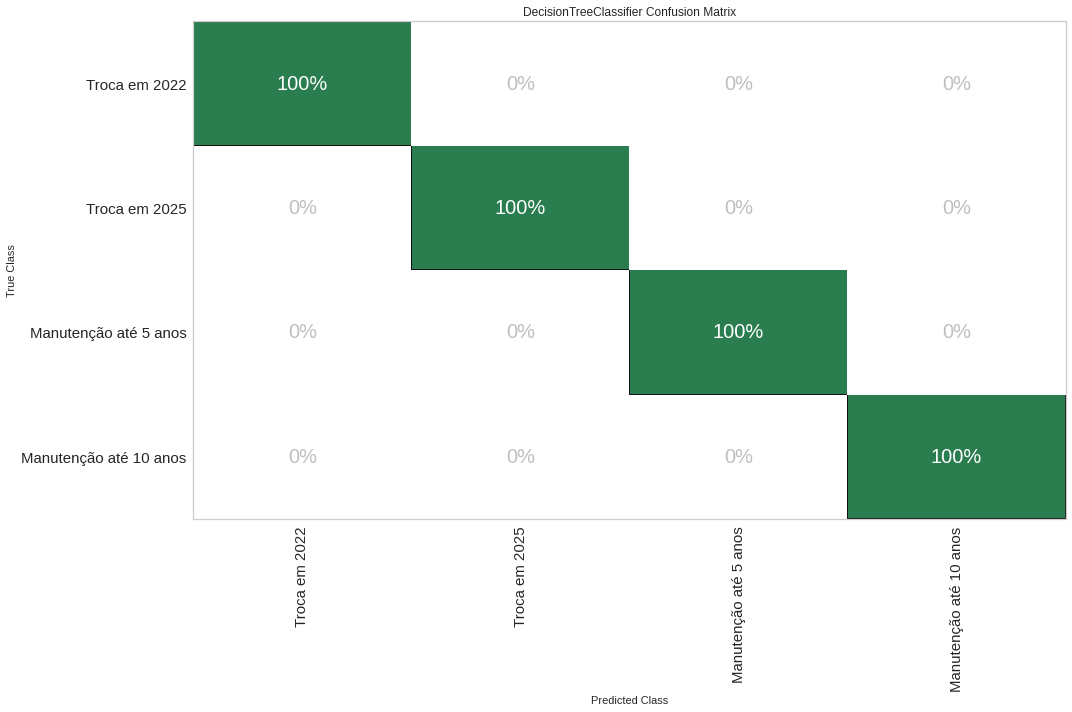

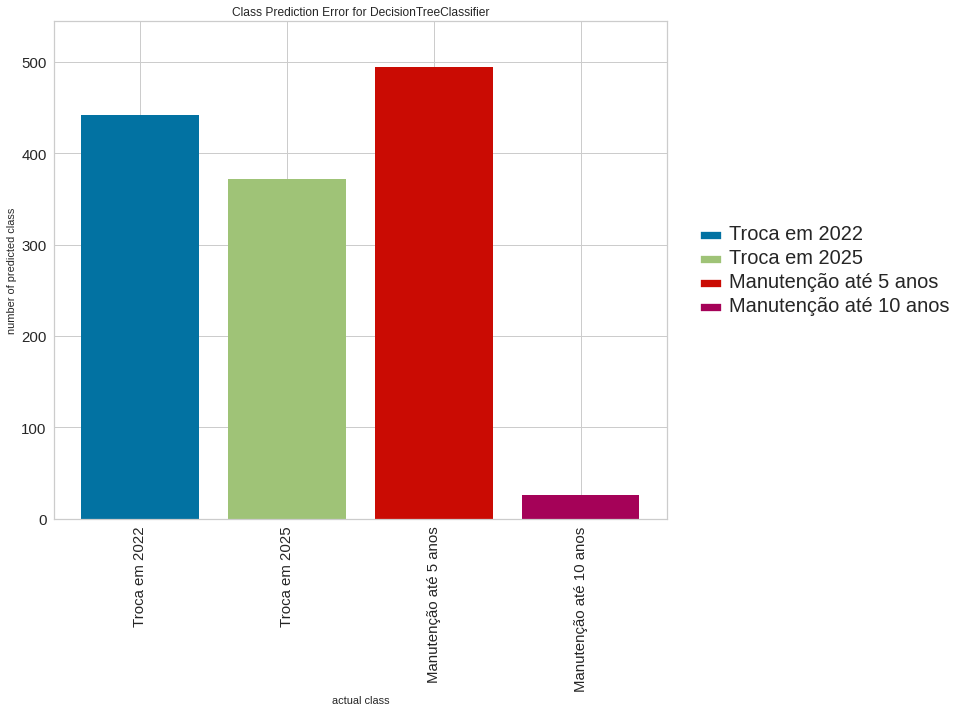

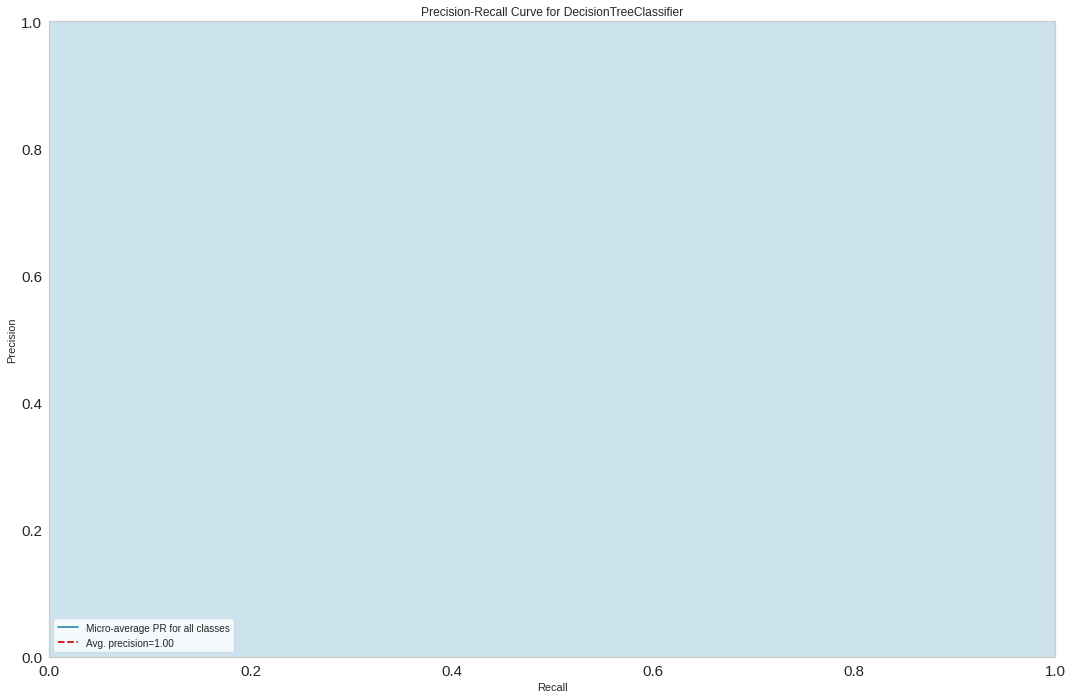

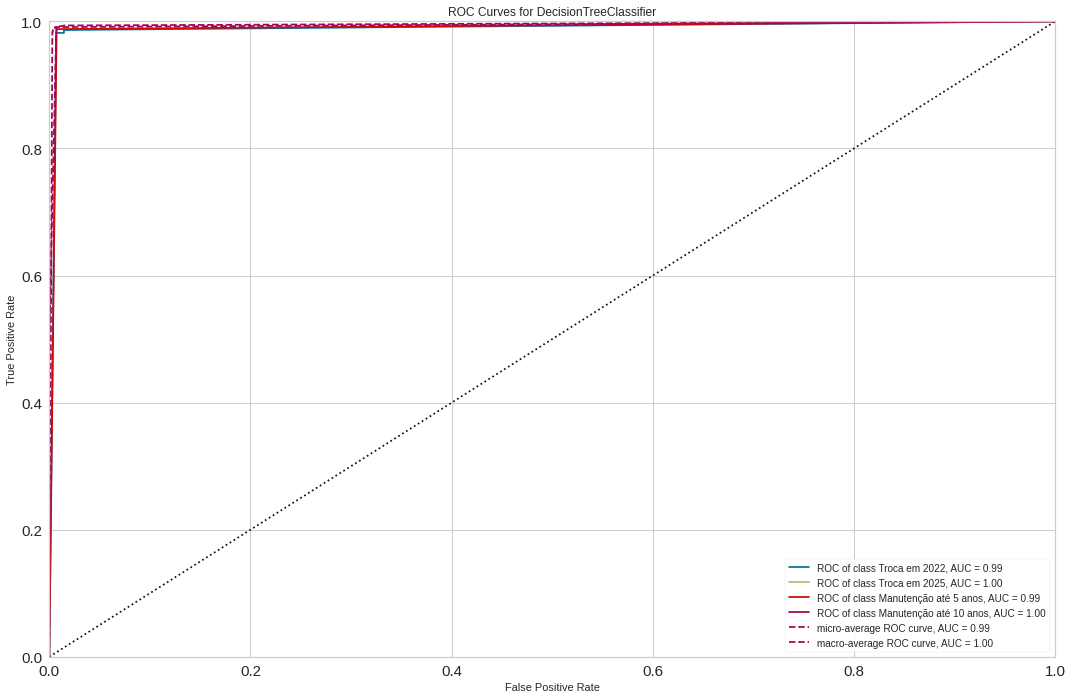

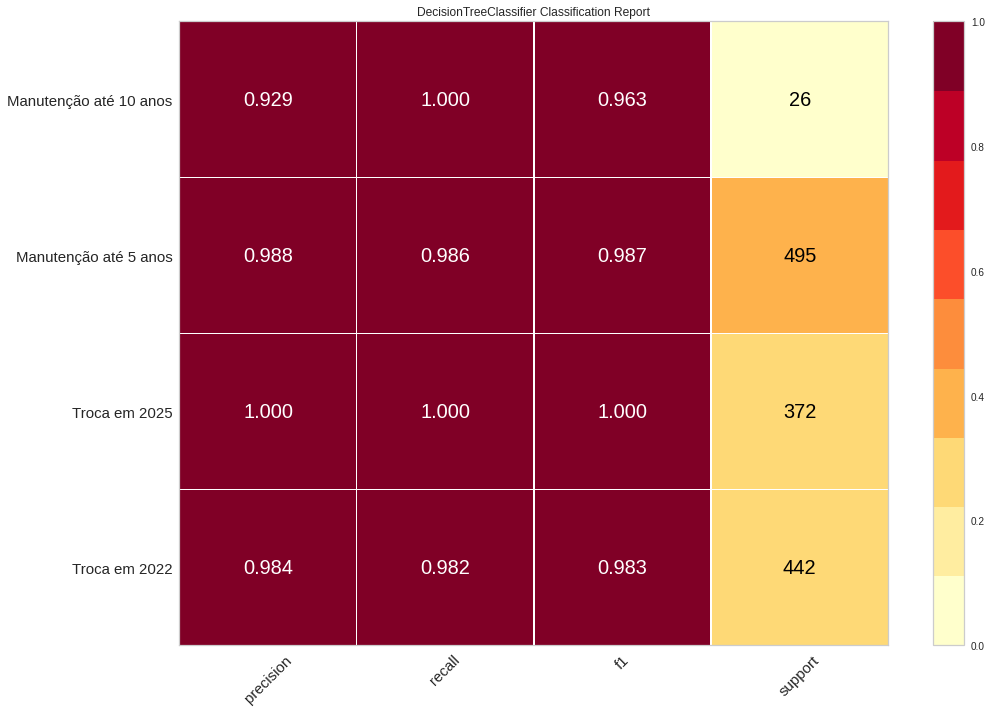

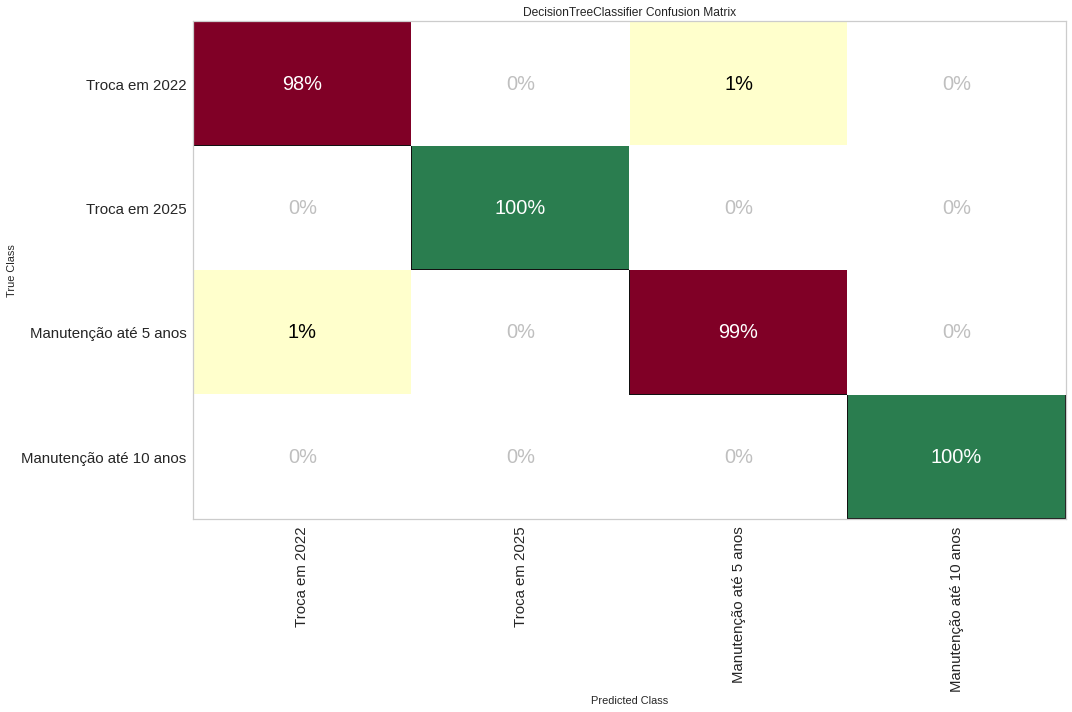

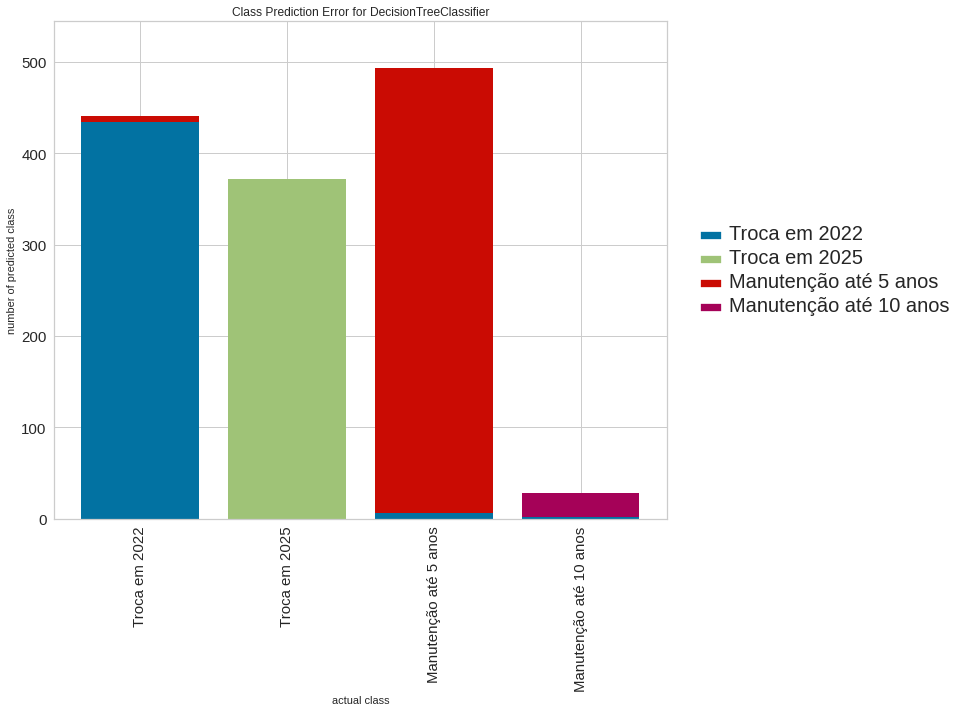

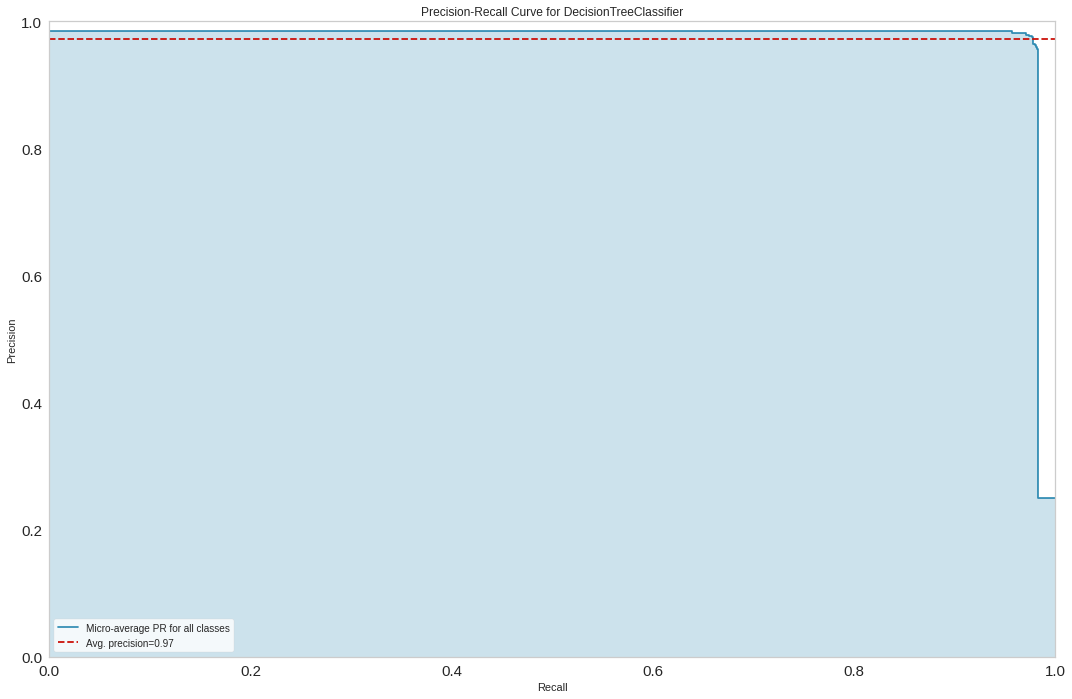

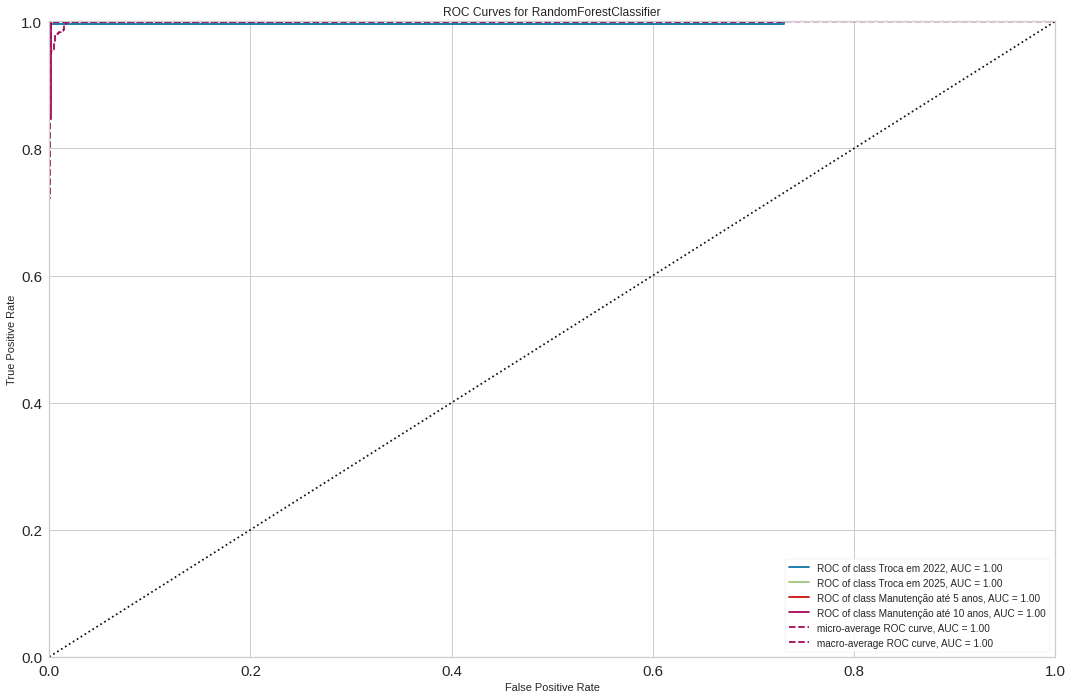

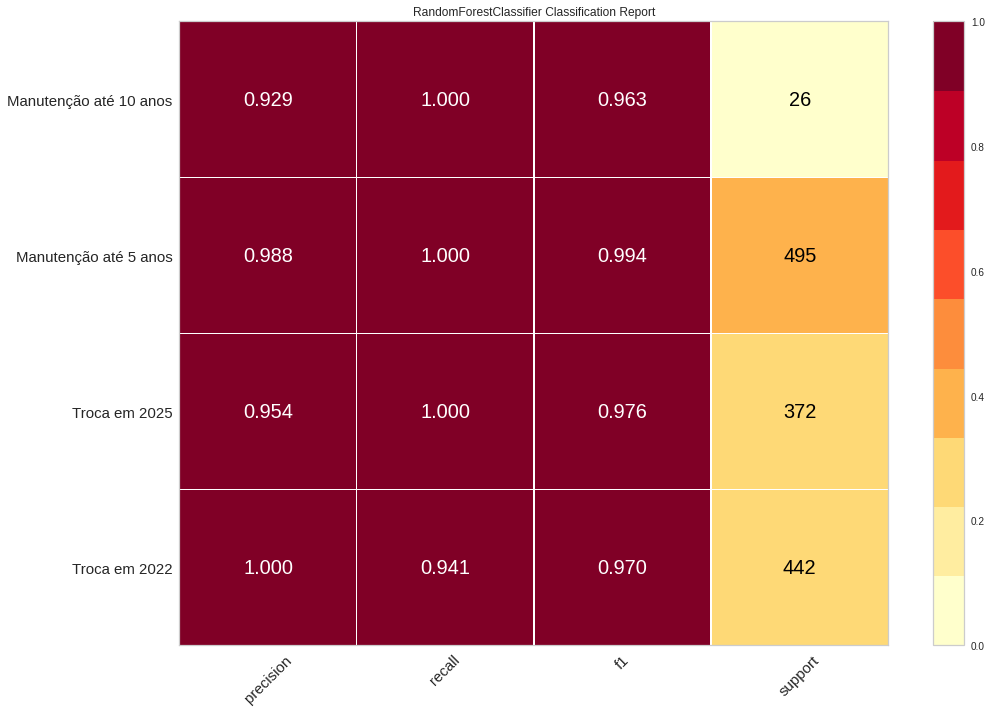

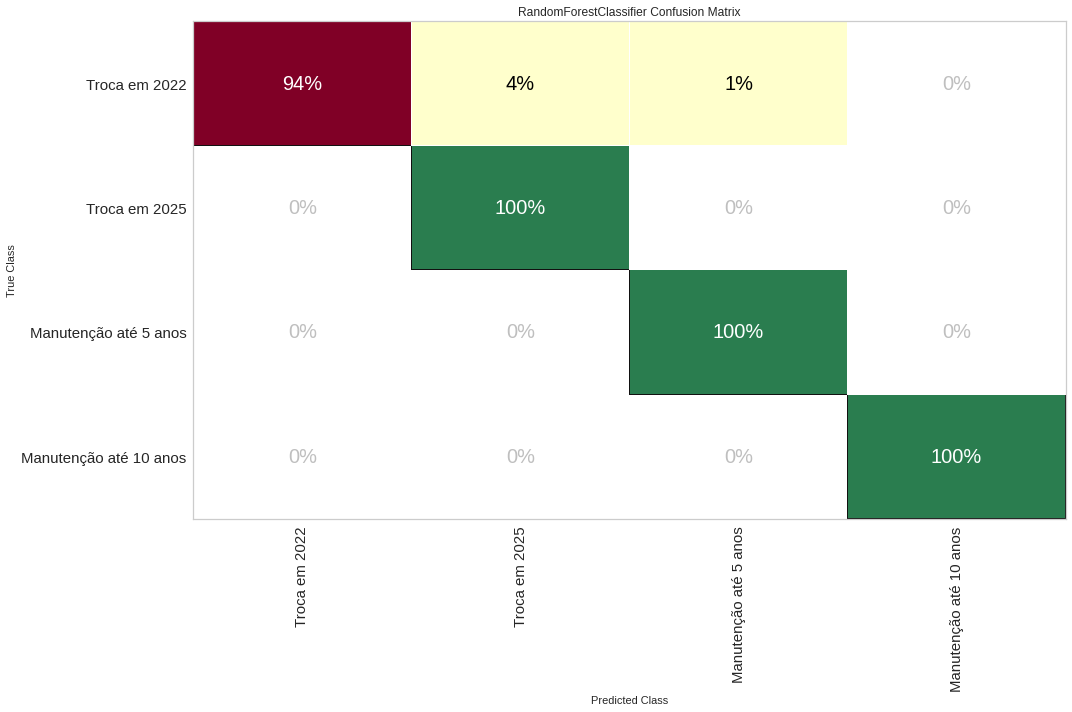

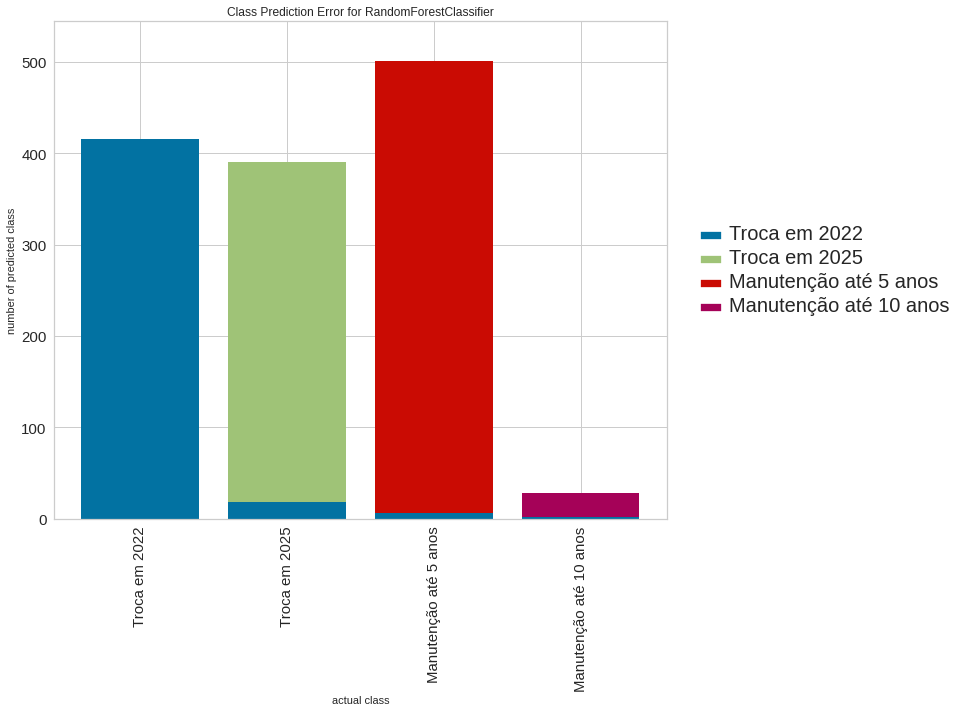

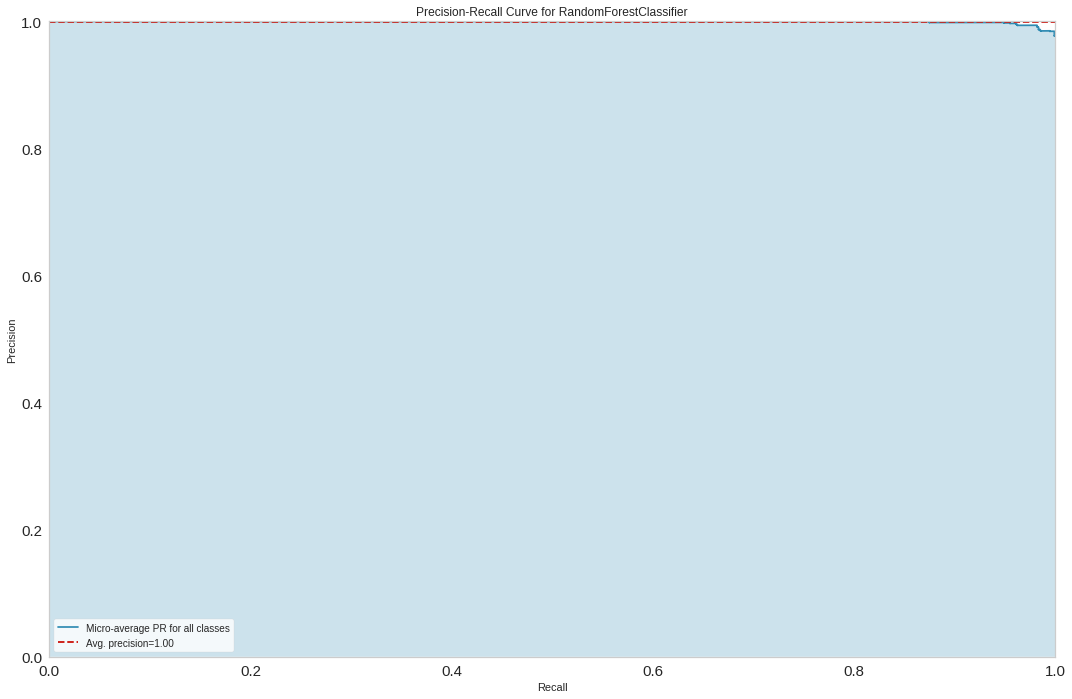

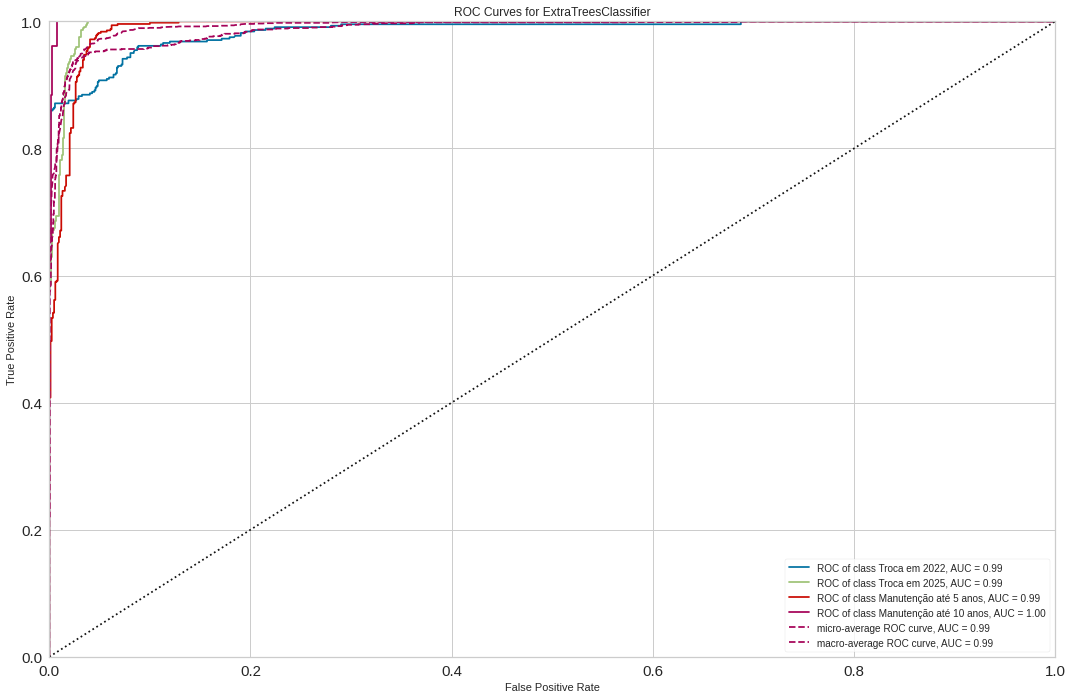

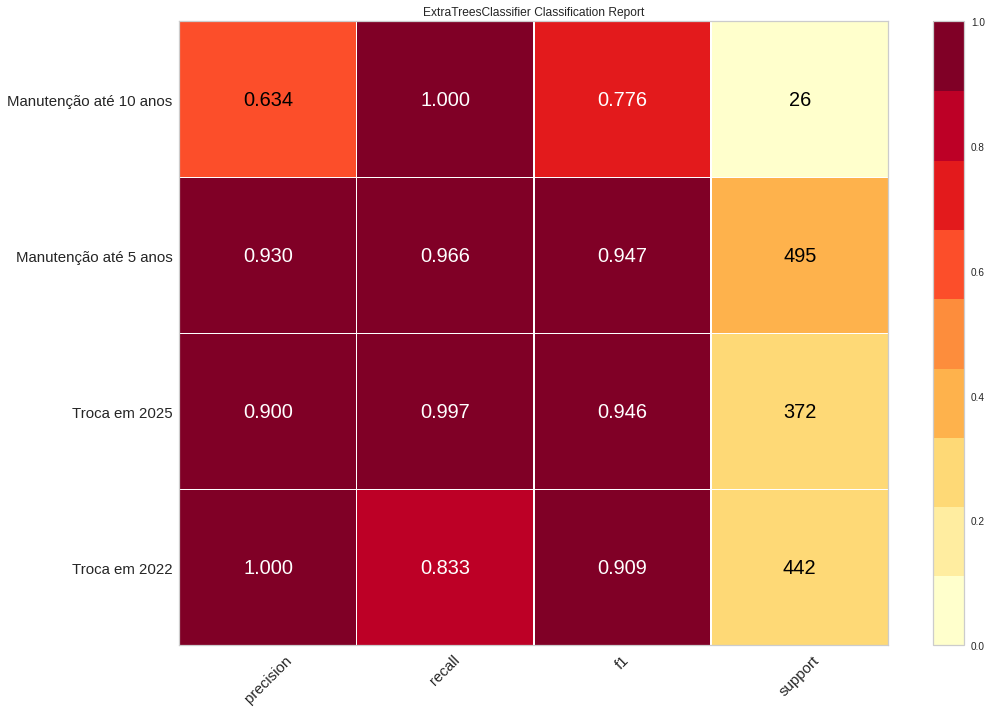

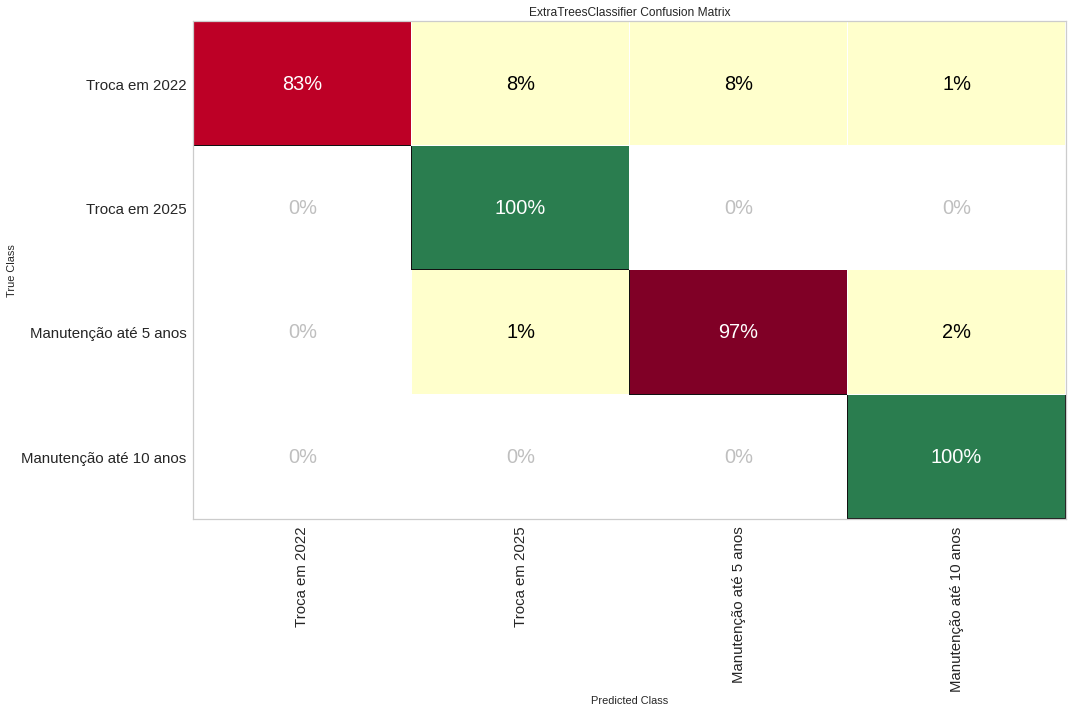

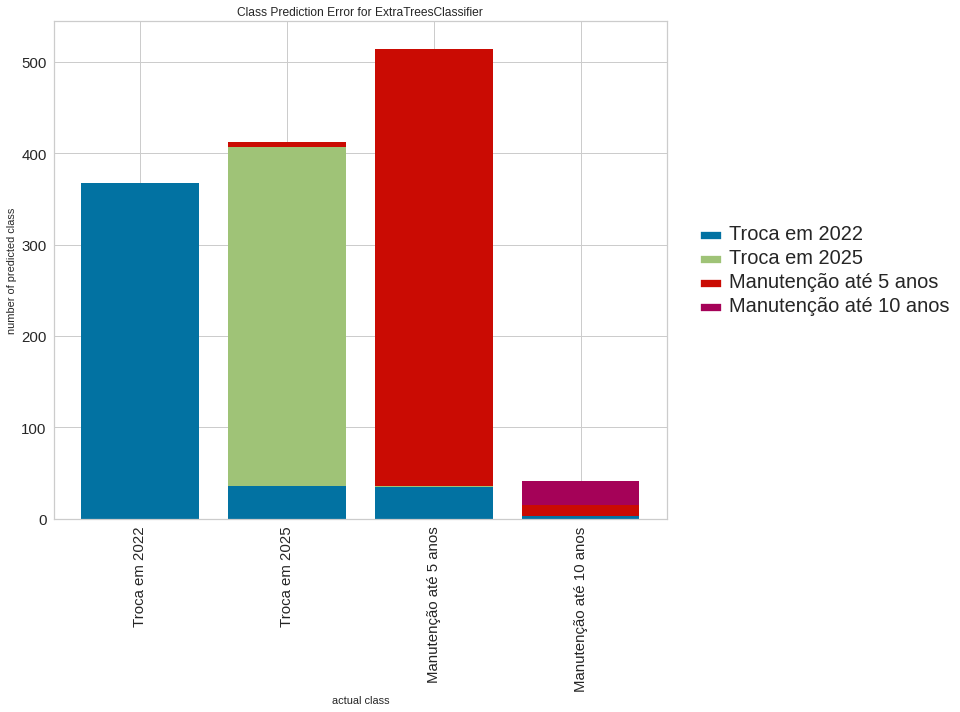

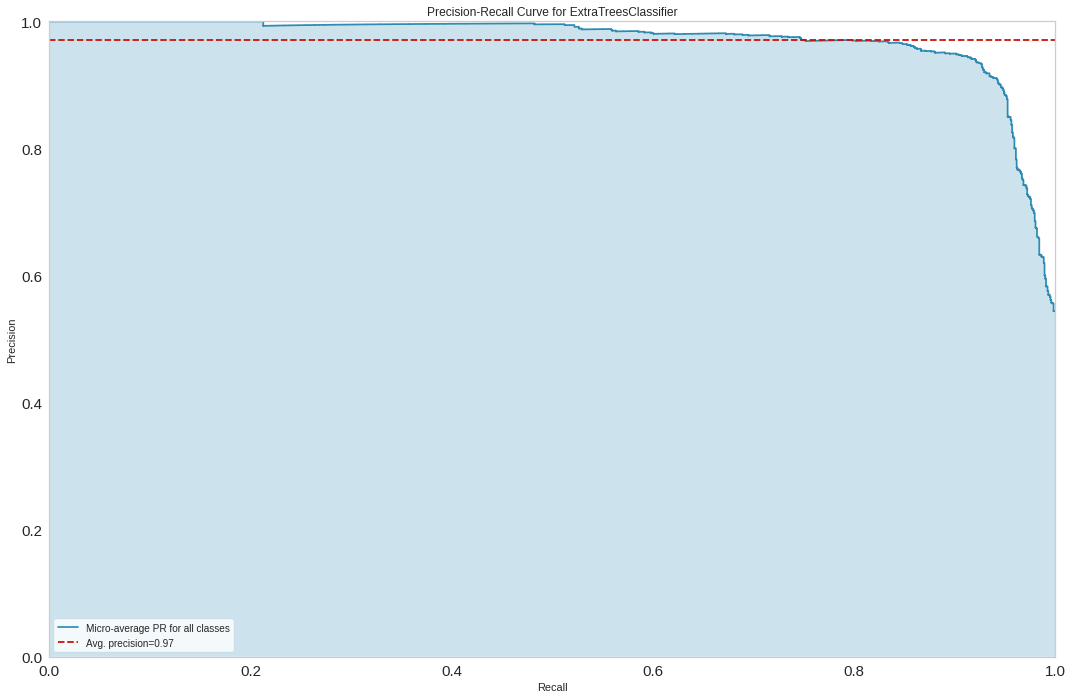

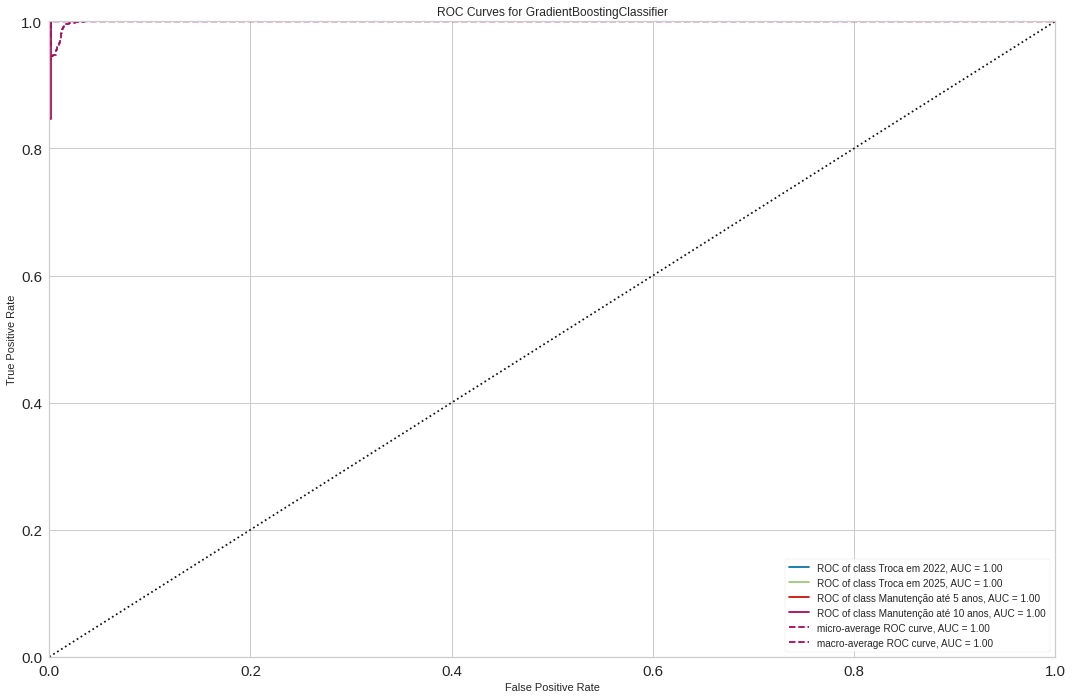

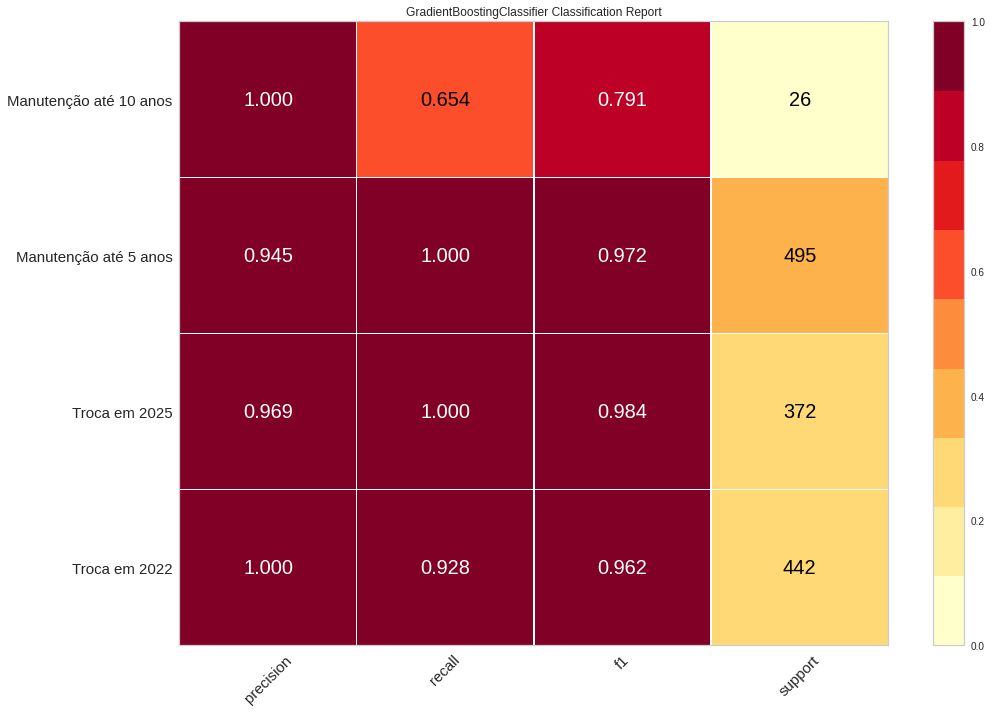

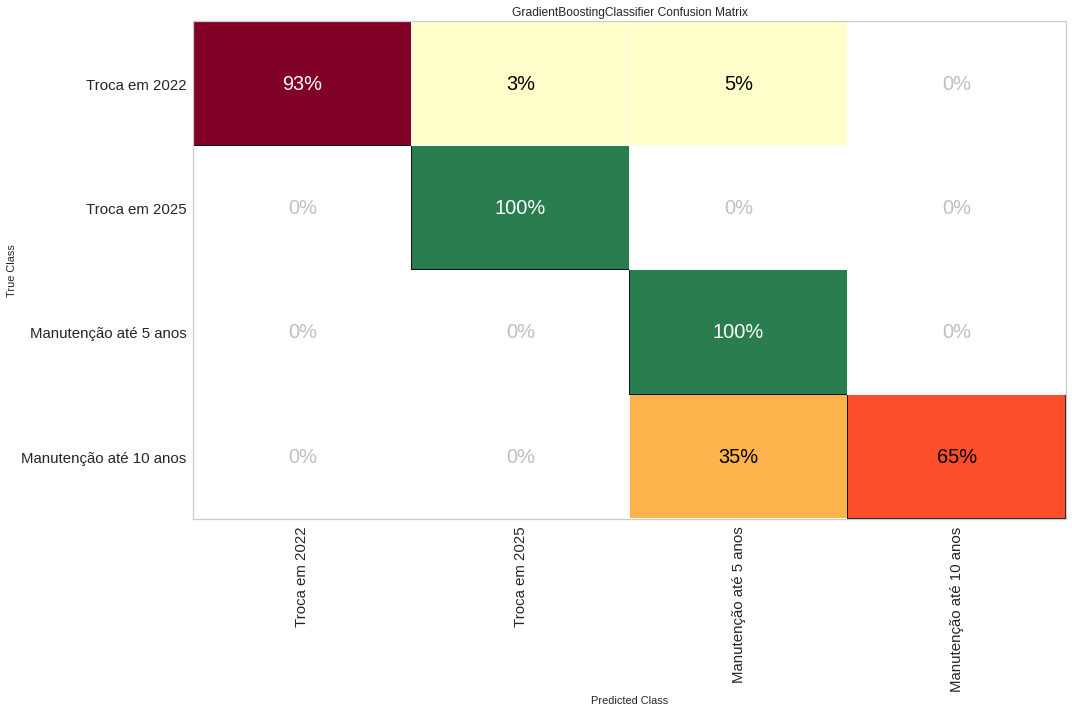

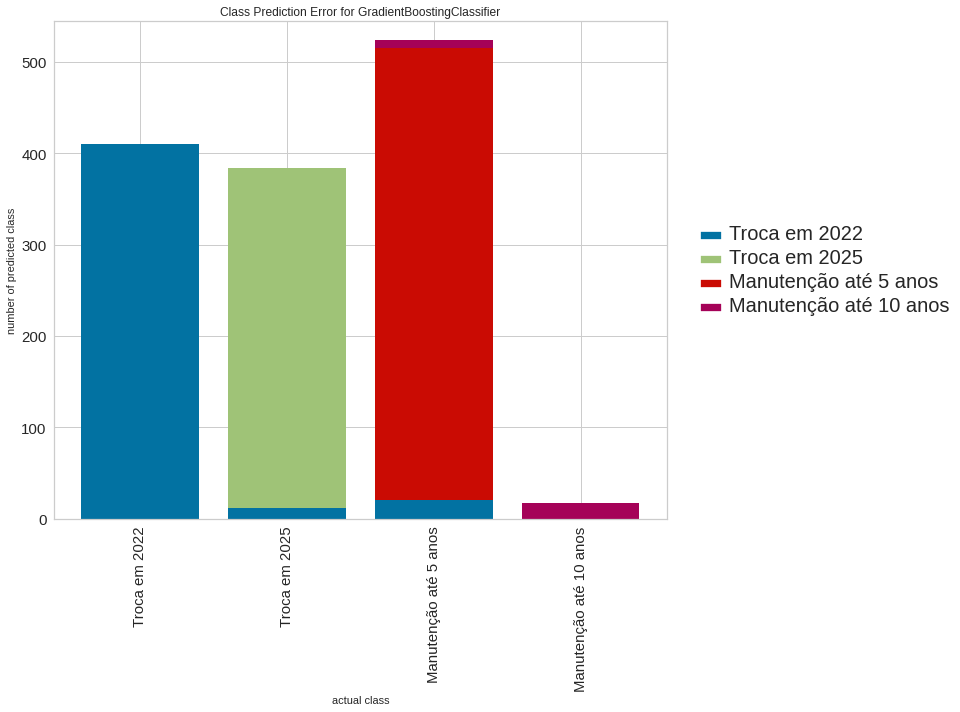

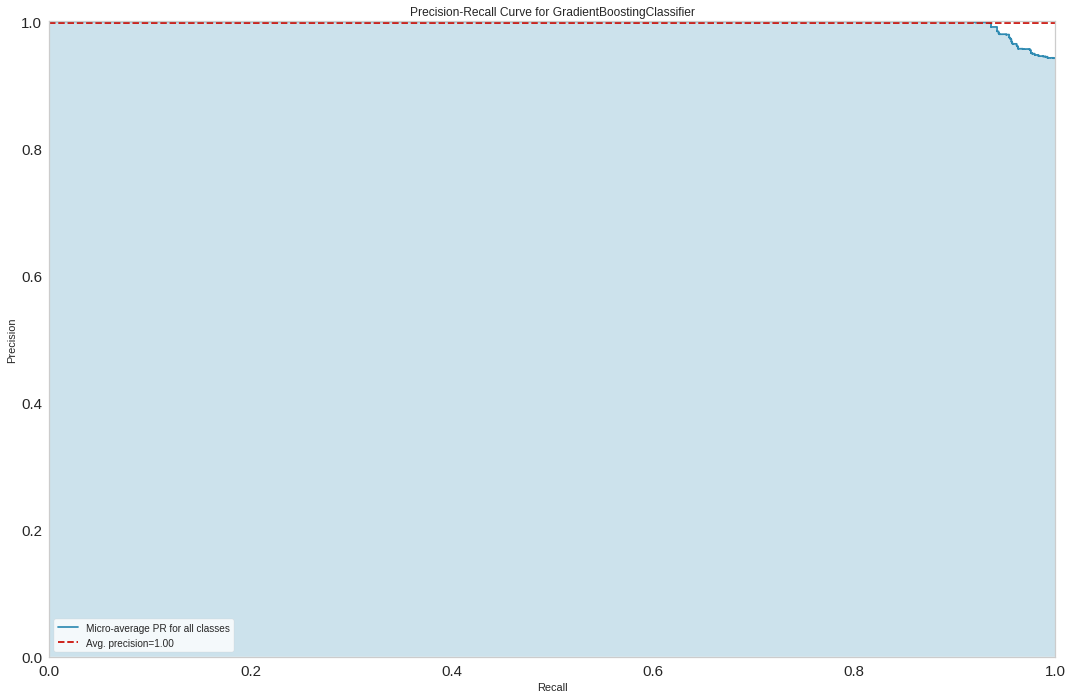

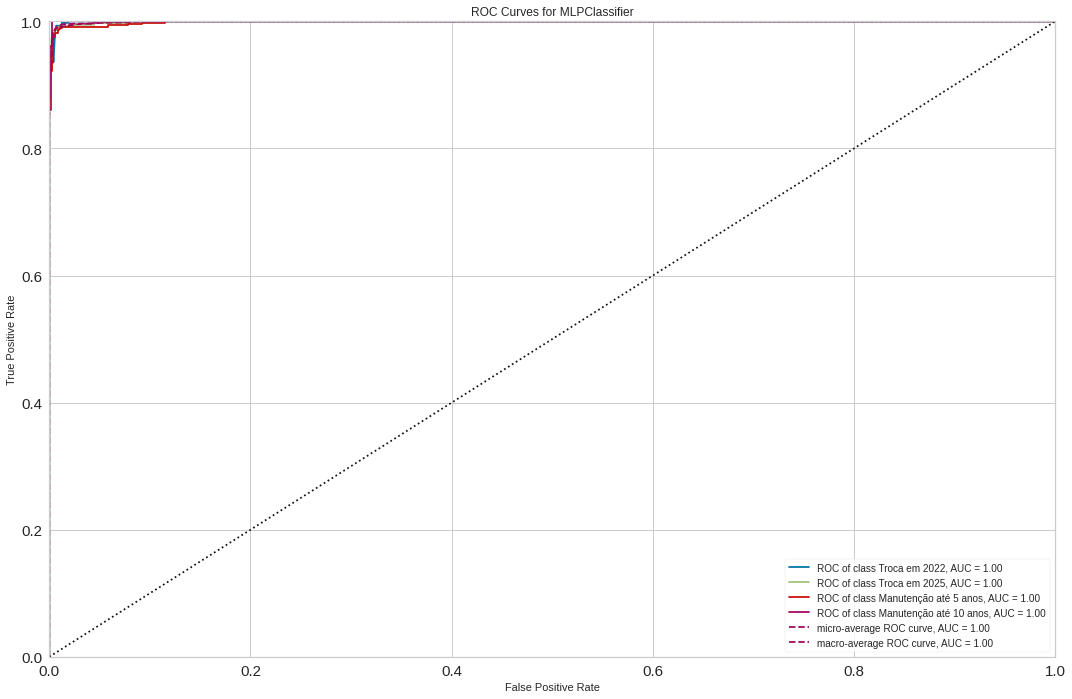

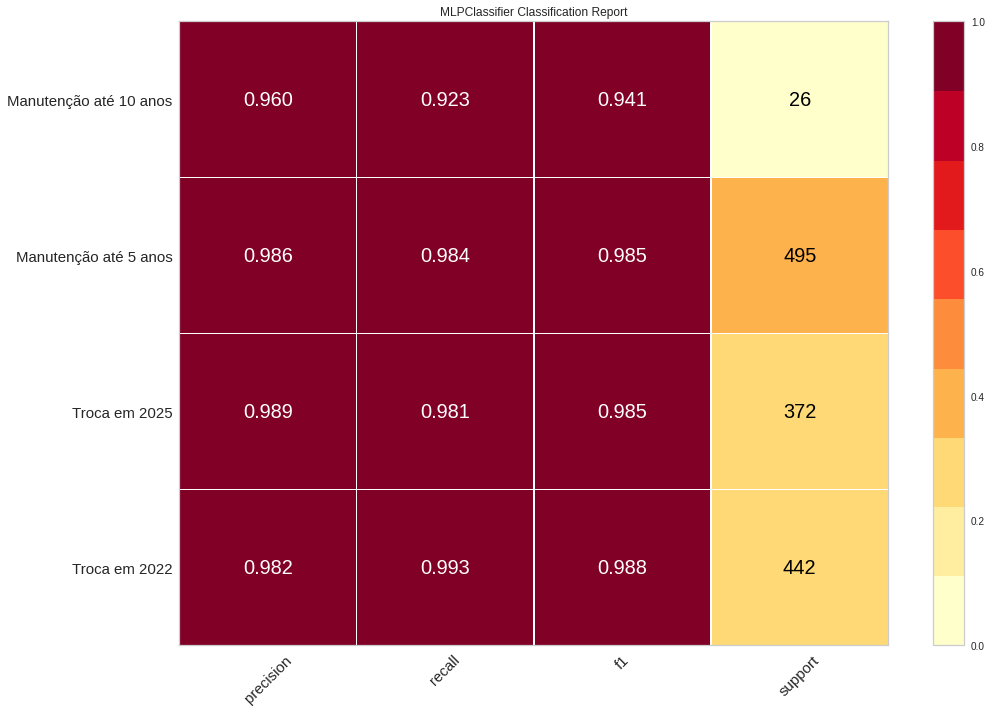

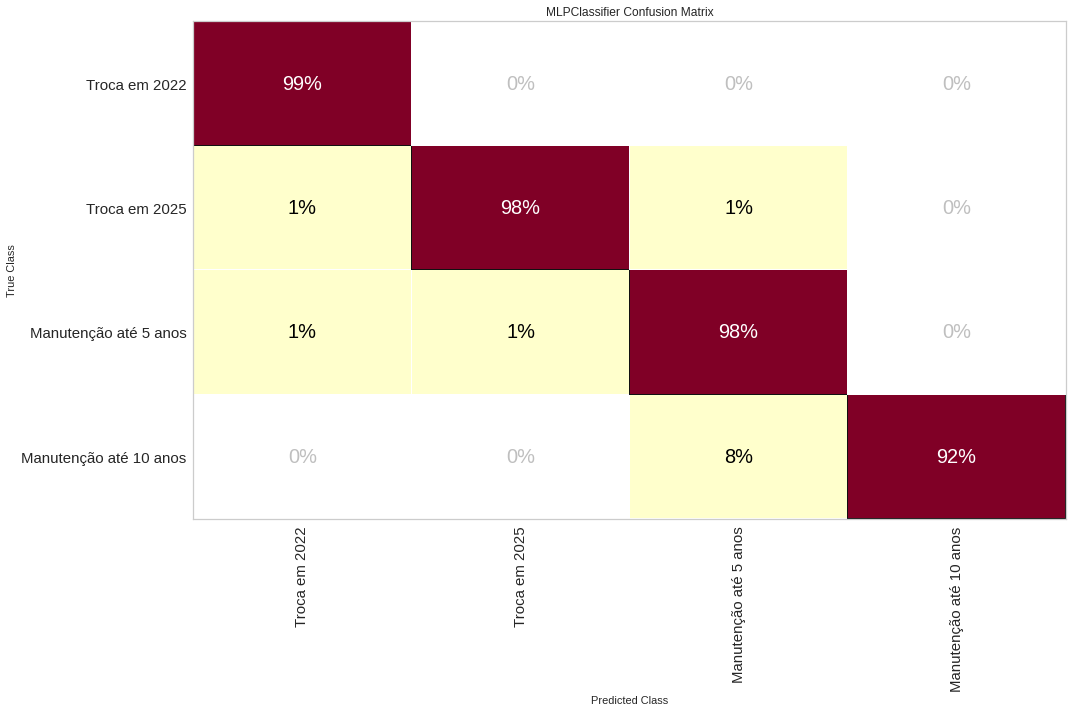

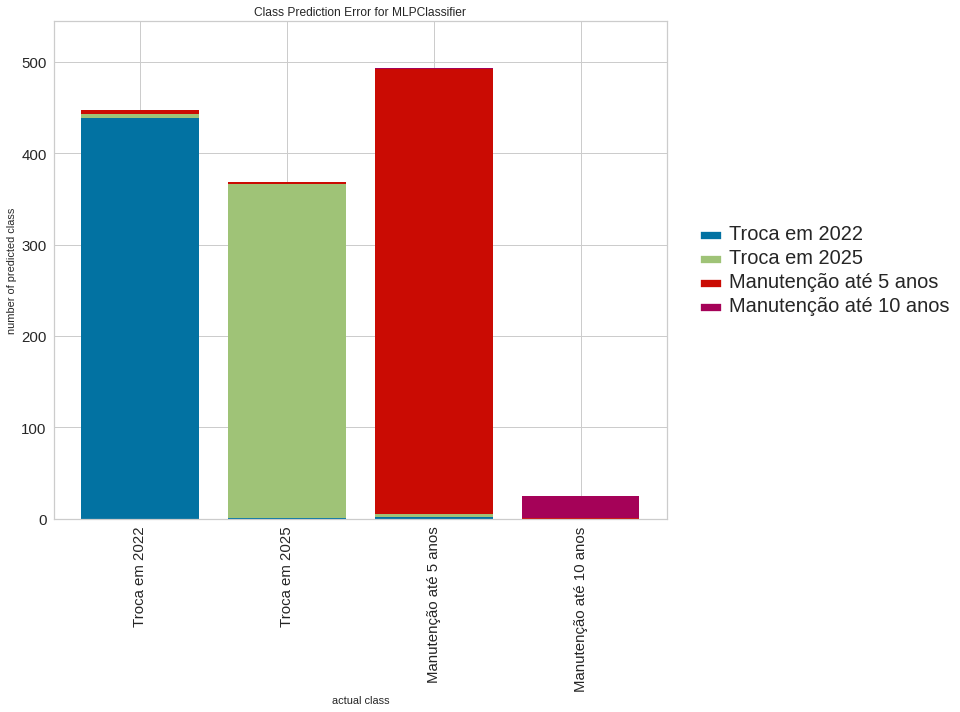

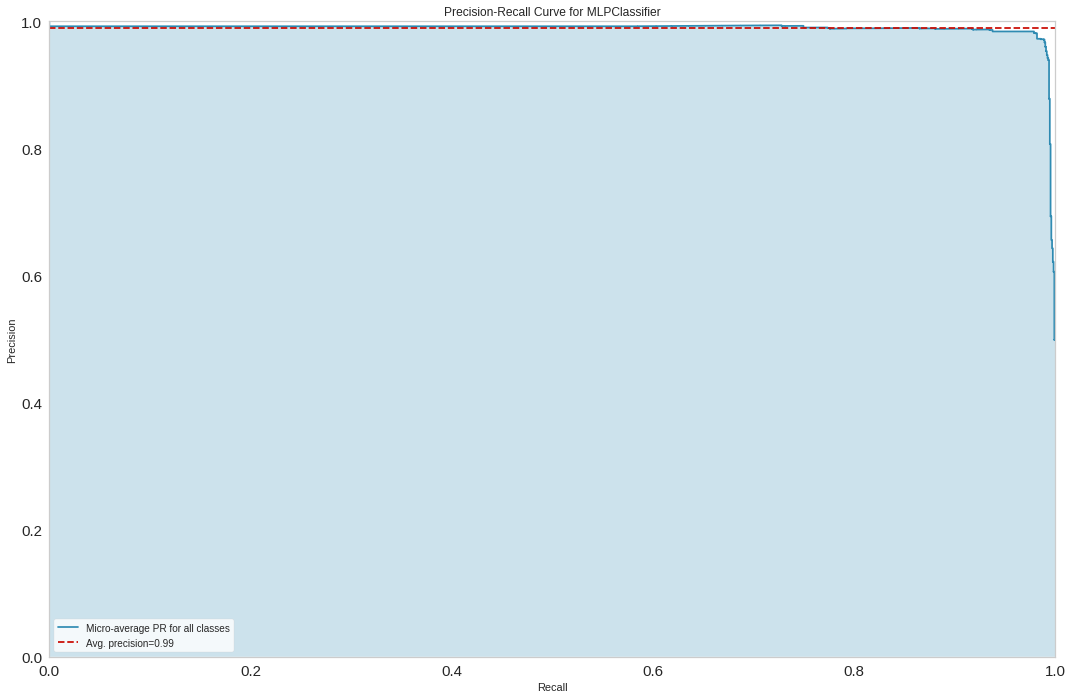

In [ ]:
for name, classifier in classifiers.items():
    plot_ROC_curve(classifier, X_train, y_train, X_test, y_test,class_name,name)
    matrix(classifier, X_train, y_train, X_test, y_test,class_name,name)
    matrixconf(classifier, X_train, y_train, X_test, y_test,class_name,name)
    classpred(classifier, X_train, y_train, X_test, y_test,class_name,name)
    precisionc(classifier, X_train, y_train, X_test, y_test,class_name,name)
    crossval(classifier, X_train, y_train, X_test, y_test)